Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Load the Dataset


In [2]:
df=pd.read_excel('/content/drive/MyDrive/PProcessed_Flipdata.xlsx')

Data Analysis

In [3]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [4]:
df.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


In [5]:
# Shape of dataset
df.shape

(541, 12)

In [6]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [7]:
# check for the null-values
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [8]:
# Transpose the describe the dataframe
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.0,289.711645,182.359185,0.0,135.00,273.00,434.00,642.00
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94
Prize,541.0,16228.375231,10793.588322,920.0,9290.00,13499.00,19280.00,80999.00


In [9]:
# check for duplicate value
df.duplicated().sum()

0

In [10]:
# Rename Prize column to Price

df.rename(columns={'Prize':'Price'},inplace=True)

In [11]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [12]:
# Drop unneccessary column
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [13]:
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

In [14]:
# Check Unique Values for each variables

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Model: ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'micro

In [15]:
# Checking the Total number of Unique Values for each variable

df.nunique()

,0
Model,187
Colour,275
Memory,5
RAM,5
Battery_,37
Rear Camera,14
Front Camera,13
AI Lens,2
Mobile Height,38
Processor_,123


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Price          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


Observation About the Dataset

1.The dataset has 541 rows and 12 columns.

2.There are no identical values in the dataset.

3.There are no empty or null values in the dataset






EDA (Exploratory Data Analysis)

In [17]:
# Categorical column

categorical_col=df[['Model','Colour','Rear Camera','Front Camera','Processor_']]
categorical_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [18]:
numerical_col=df[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for the plots
sns.set(style="whitegrid")


Univariate Analysis

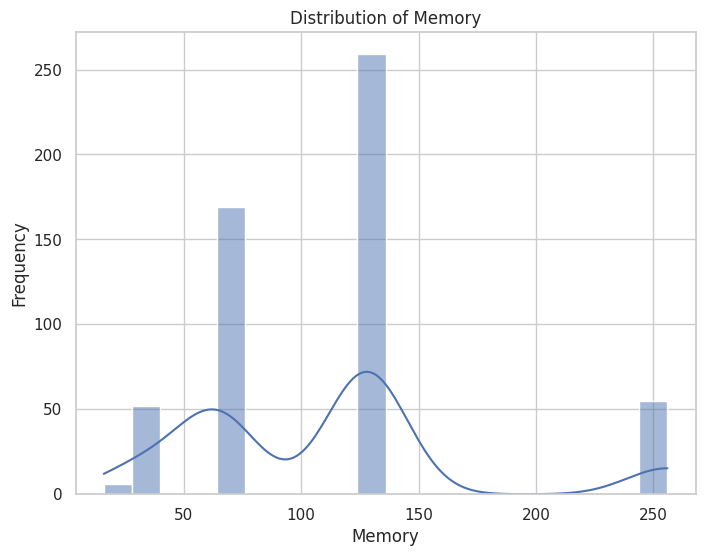

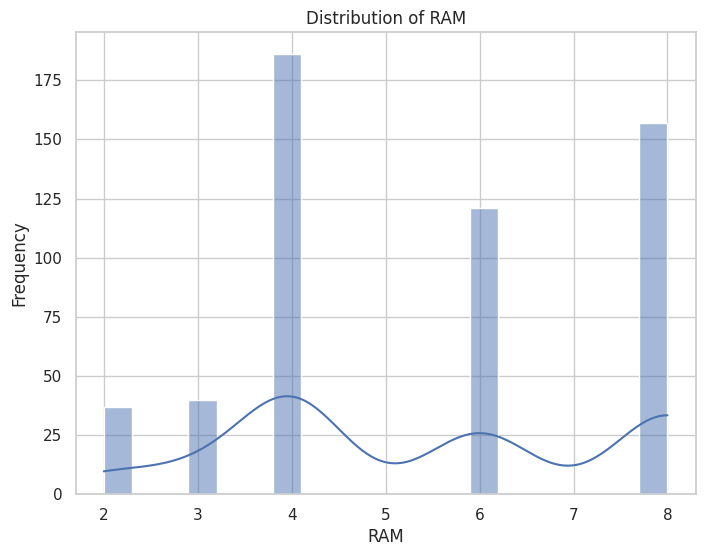

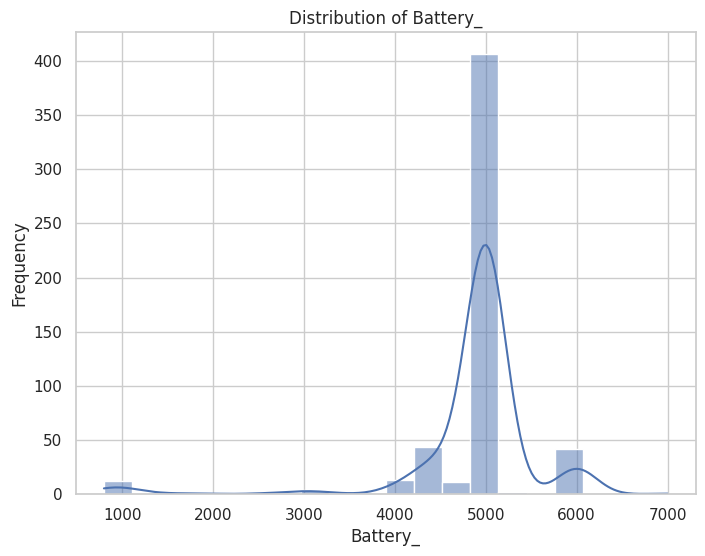

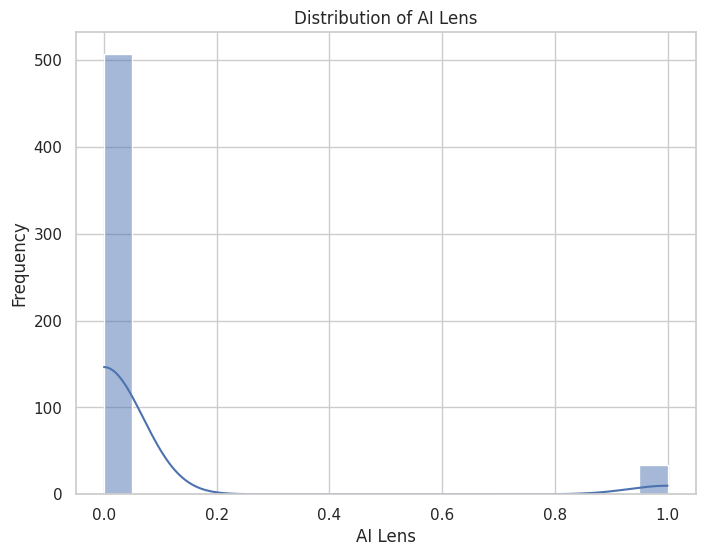

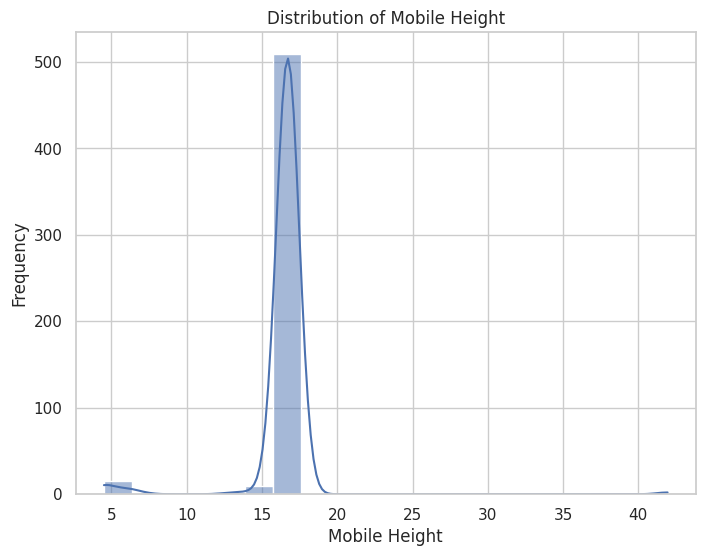

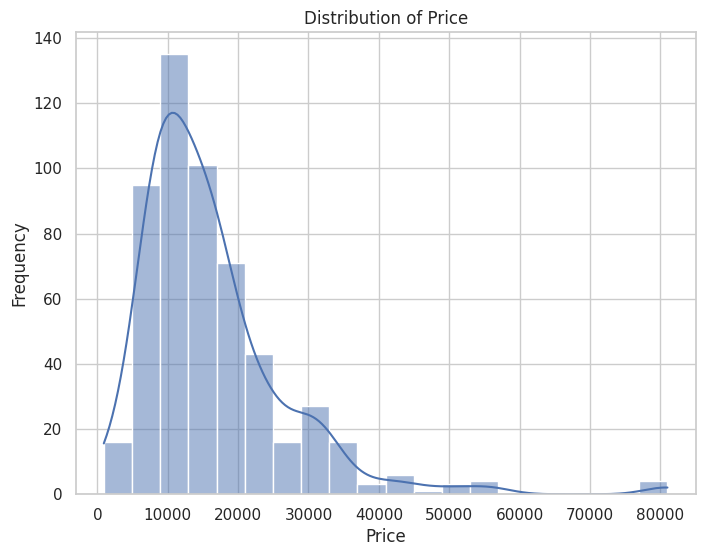

In [20]:
numerical_col=df[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

#Plot histograms for numeric columns

for col in numerical_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Observations:


*   Memory - There's a peak around a specific values e.g.,128GB or 256GB, it suggest that these memory sizes are common.

*   RAM - 4GB, 6GB, OR 8GB indicates the most common RAM sizes in dataset.

*   Battery_ - It shows majority phones have a standard battery size.

*   Mobile Height - It shows that most phones fall within a standard height range.

*   Price - It shows most of the phonrs are within a specific price range, while most of the phones are affordable and few are expensive ones.



Univariate analysis for categorical column

In [21]:
#Model

df['Model'].value_counts()

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
...,...
vivo Y1s,1
OnePlus Nord,1
Micromax 3,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

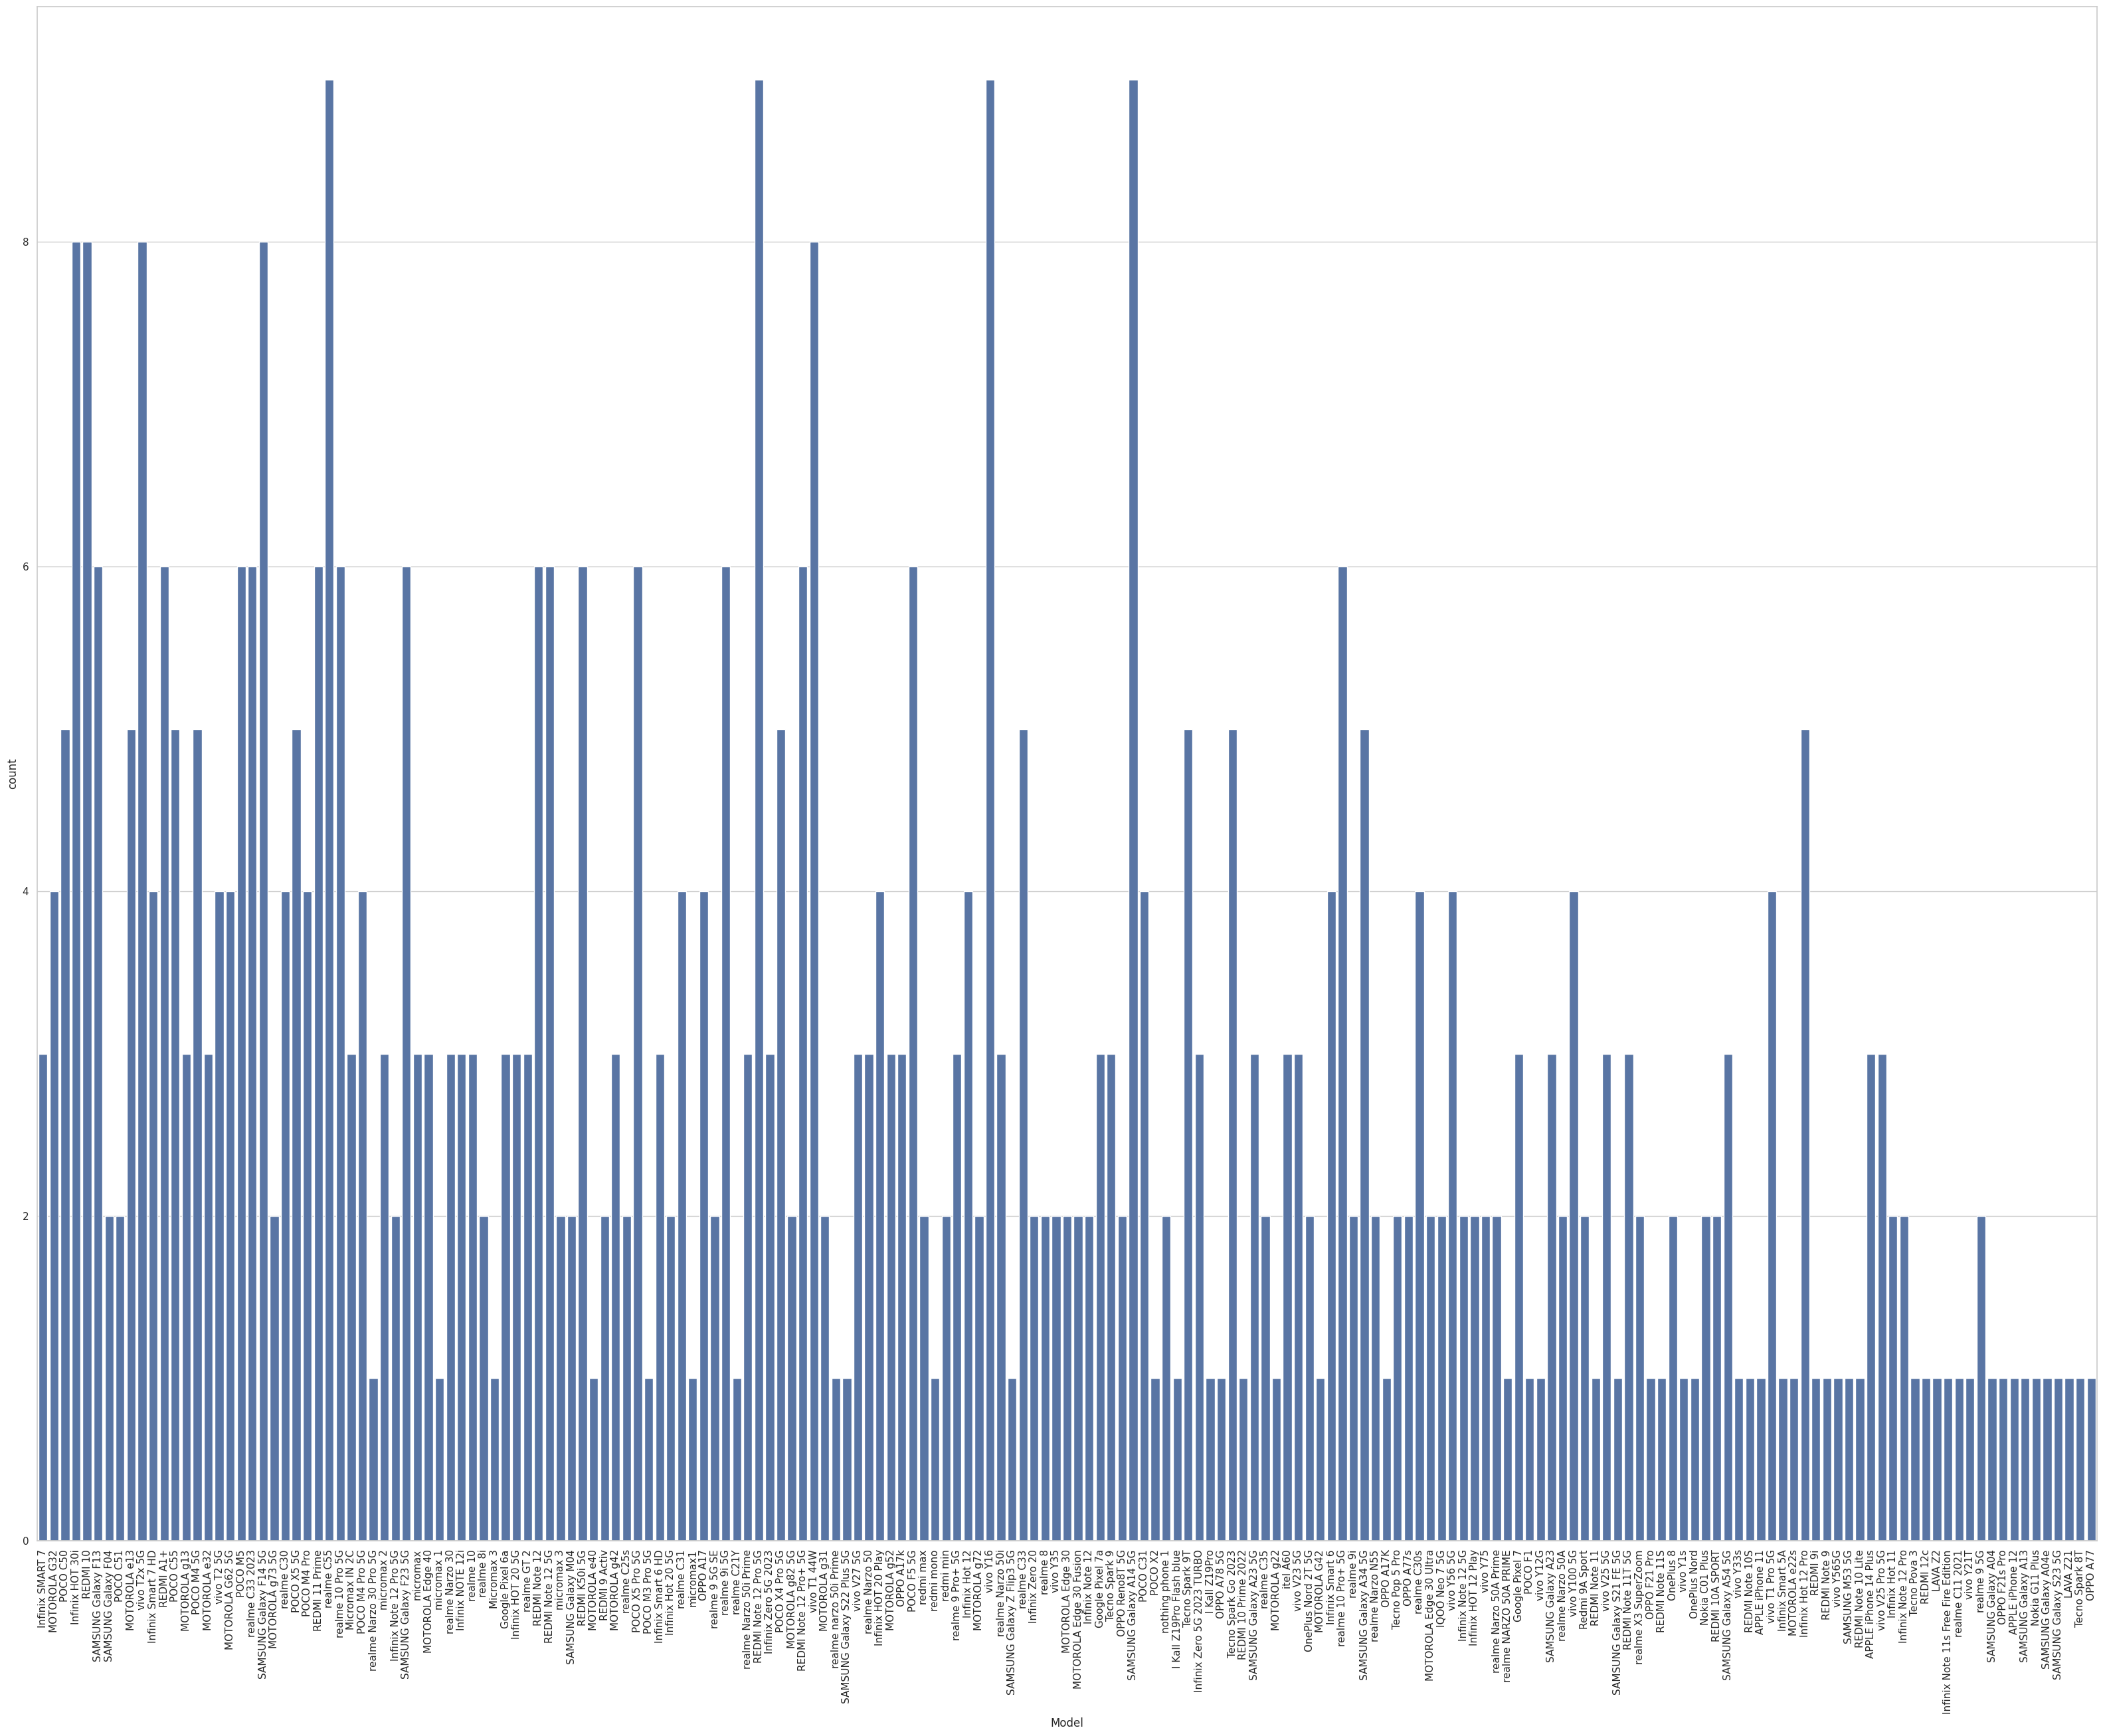

In [22]:
plt.figure(figsize=(40,30))
sns.countplot(x='Model',data=df)
plt.xticks(rotation=90)


The bar plot shows realmeC55 model have more phones and models like realmeNarzo30Pro5G,micromax1, Micromax3 etc have less phones.

In [23]:
# Colour

df['Colour'].value_counts()

,count
Colour,
Yellow,12
Royal Blue,8
Power Black,8
Black,8
Midnight Black,7
...,...
Polar Blue,1
Cosmic grey,1
Sea,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

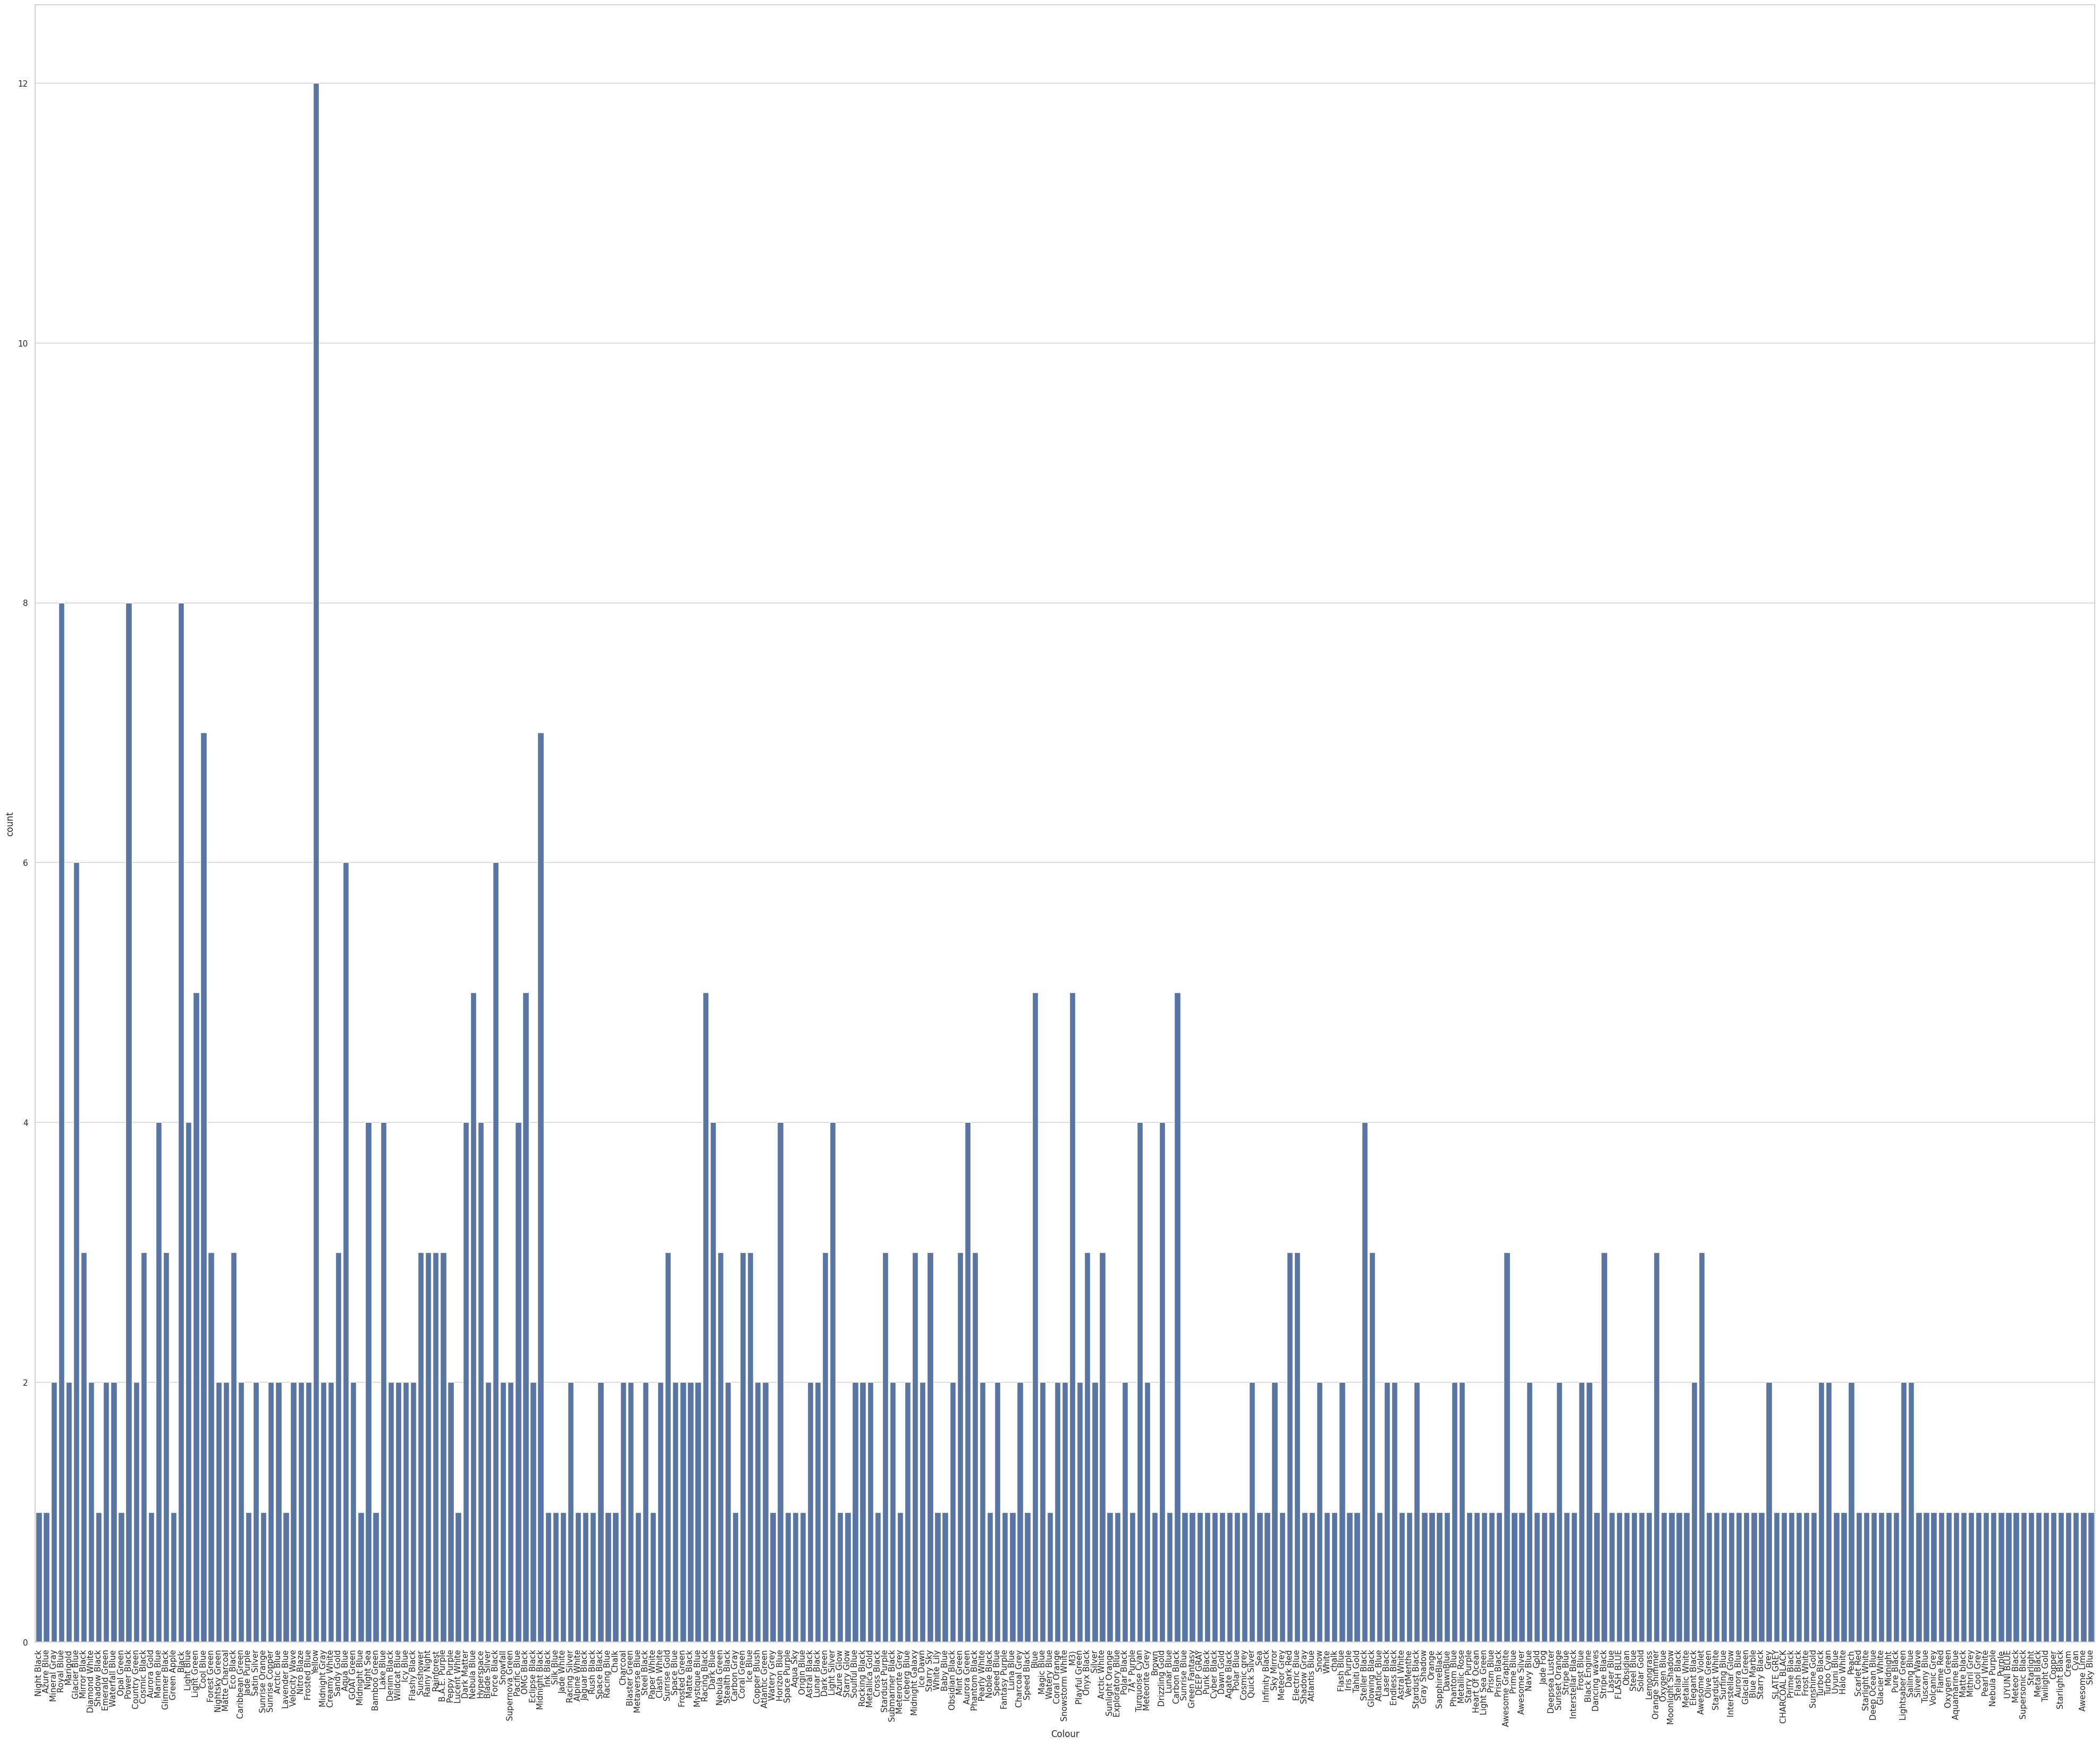

In [24]:
plt.figure(figsize=(50,40))
sns.countplot(x='Colour',data=df)
plt.xticks(rotation=90)

It shows distribution of different colour. Yellow colour bar is significantly taller than others so it might be popular colour.

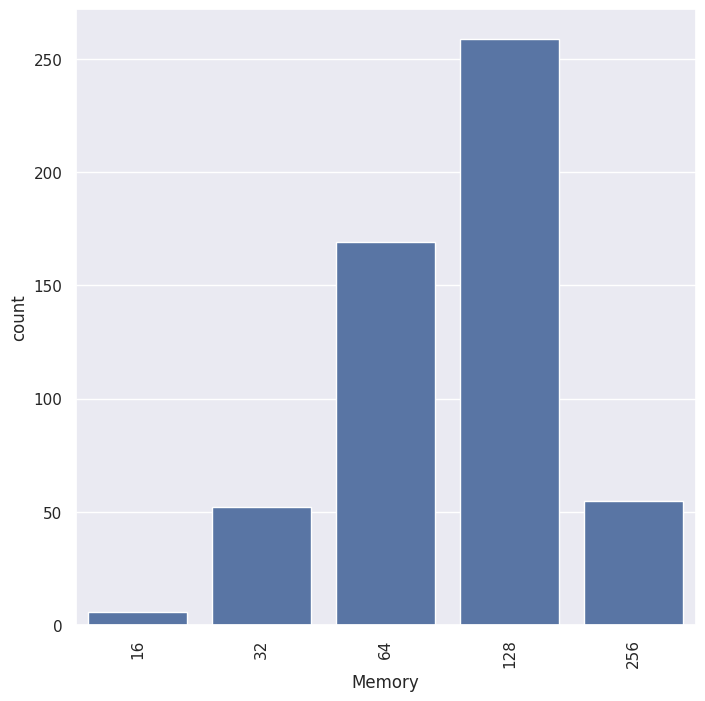

In [25]:
# Memory

sns.set()
plt.figure(figsize=(8,8))
sns.countplot(x='Memory',data=df)
plt.xticks(rotation=90)
plt.show()

Majority of the mobile phones has 128gb Memory, it suggest that these Memory size are common.

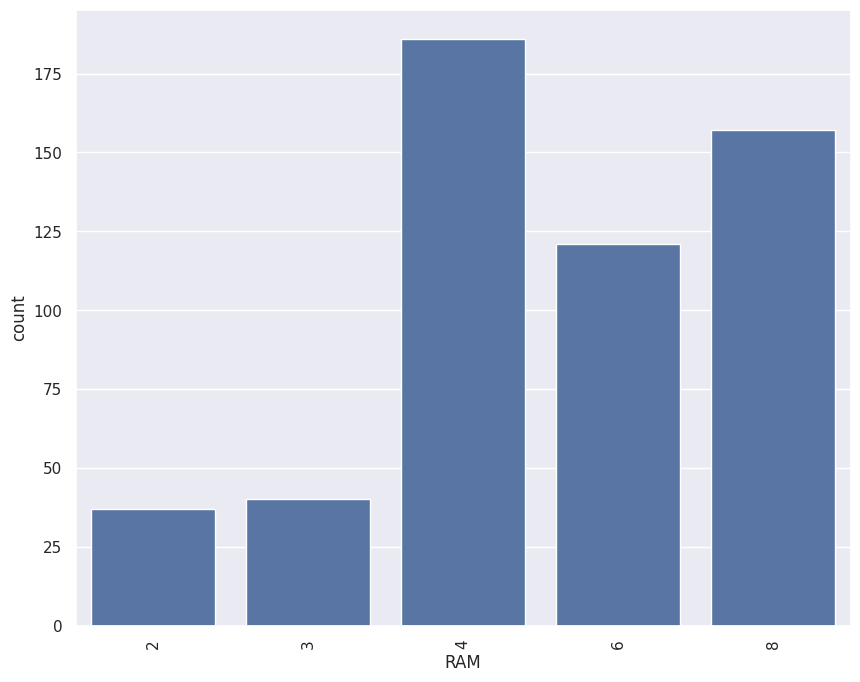

In [26]:
# RAM

sns.set()
plt.figure(figsize=(10,8))
sns.countplot(x='RAM',data=df)
plt.xticks(rotation=90)
plt.show()

4GB,6GB, or 8GB indicates the most common RAM sizes in the dataset.

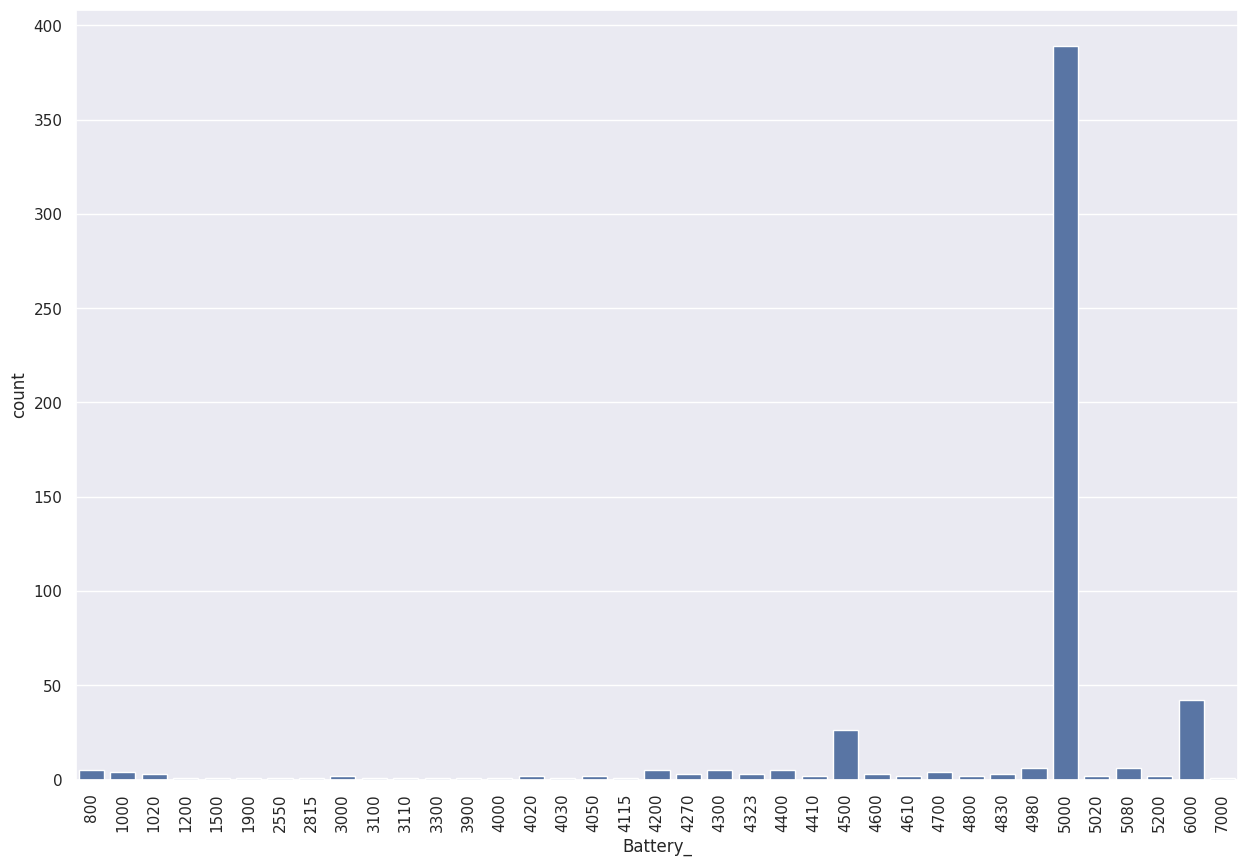

In [27]:
# Battery_

sns.set()
plt.figure(figsize=(15,10))
sns.countplot(x='Battery_',data=df)
plt.xticks(rotation=90)
plt.show()

Most phones have standard battery sizes like 4500mAh 0r 5000mAh.

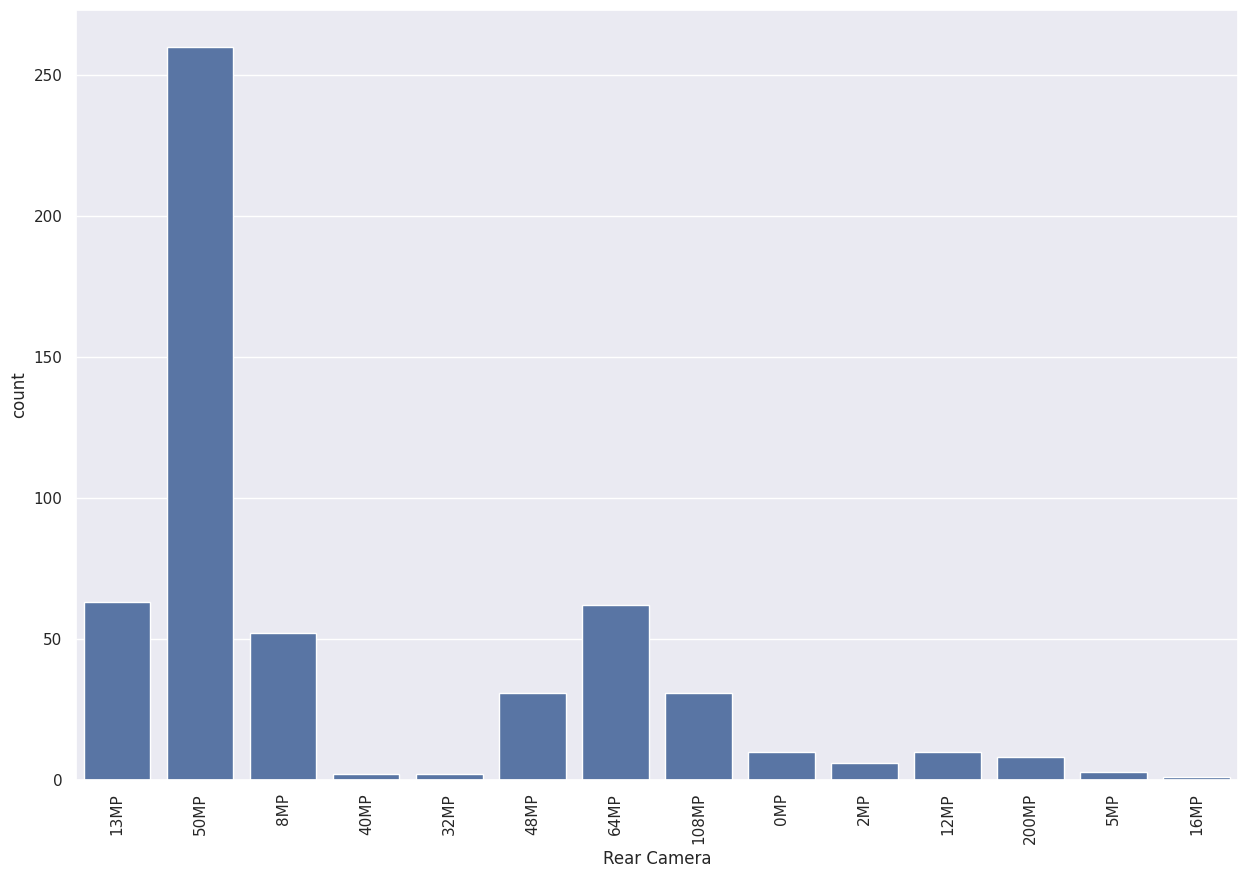

In [28]:
# Rear Camera

sns.set()
plt.figure(figsize=(15,10))
sns.countplot(x='Rear Camera',data=df)
plt.xticks(rotation=90)
plt.show()

Rear Camera with 50MP are most common.

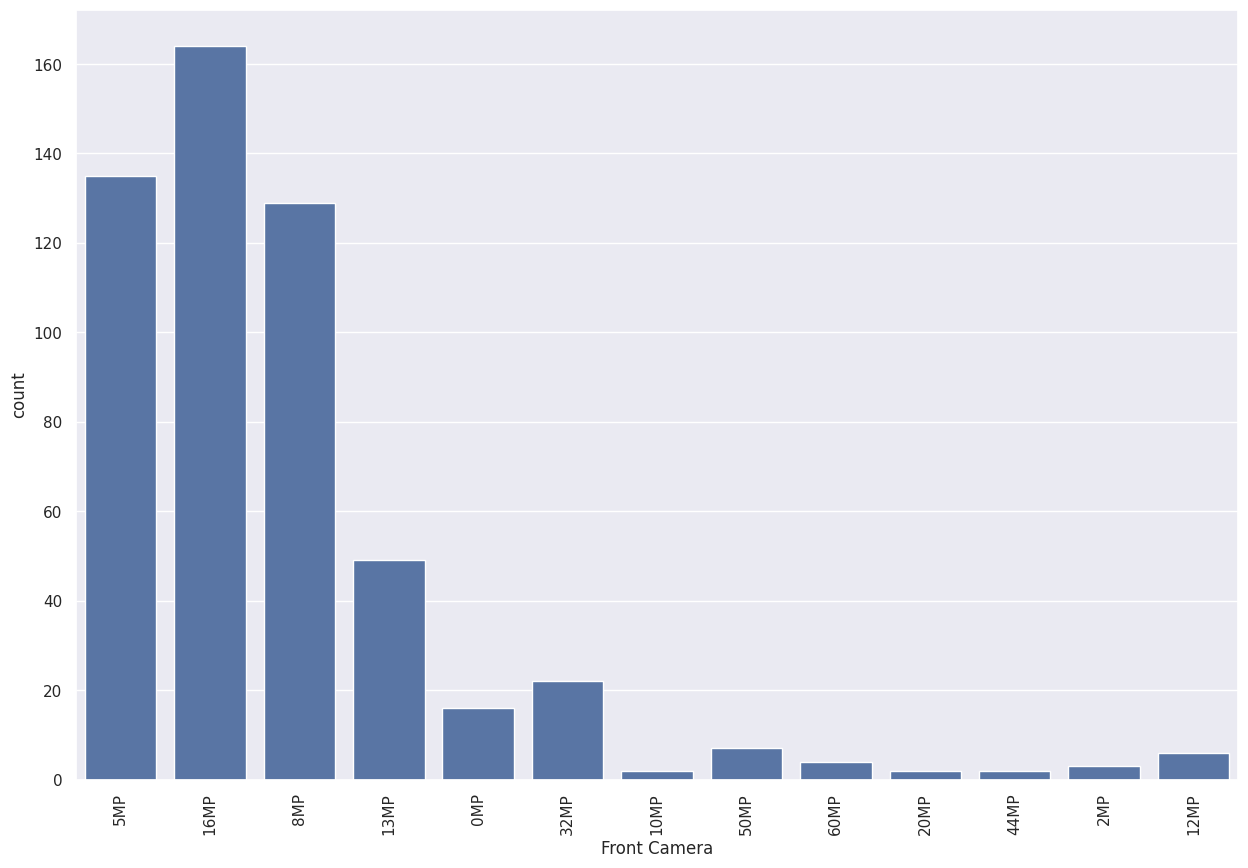

In [29]:
# Front Camera

sns.set()
plt.figure(figsize=(15,10))
sns.countplot(x='Front Camera',data=df)
plt.xticks(rotation=90)
plt.show()

Similar to rear camera, front camera shows phones with 16MP or 5MP camera are most common.  

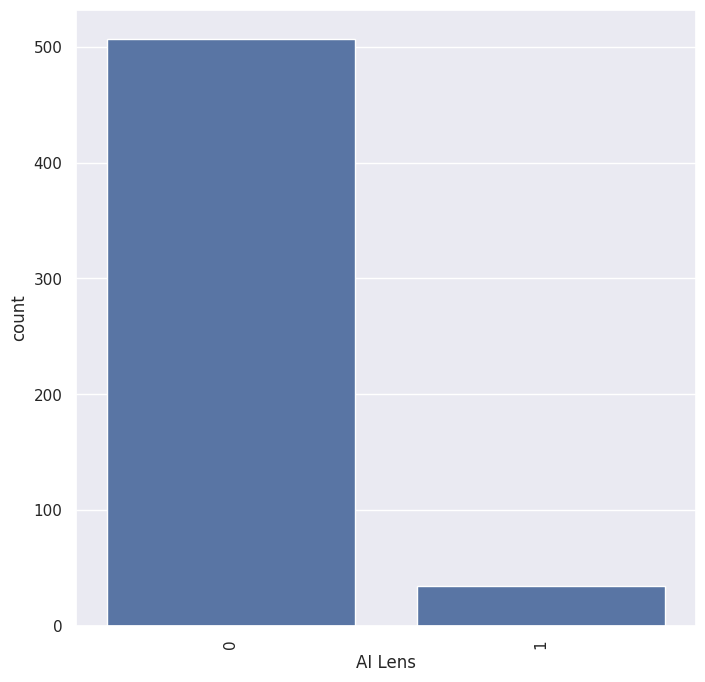

In [30]:
# AI Lens

sns.set()
plt.figure(figsize=(8,8))
sns.countplot(x='AI Lens',data=df)
plt.xticks(rotation=90)
plt.show()
#

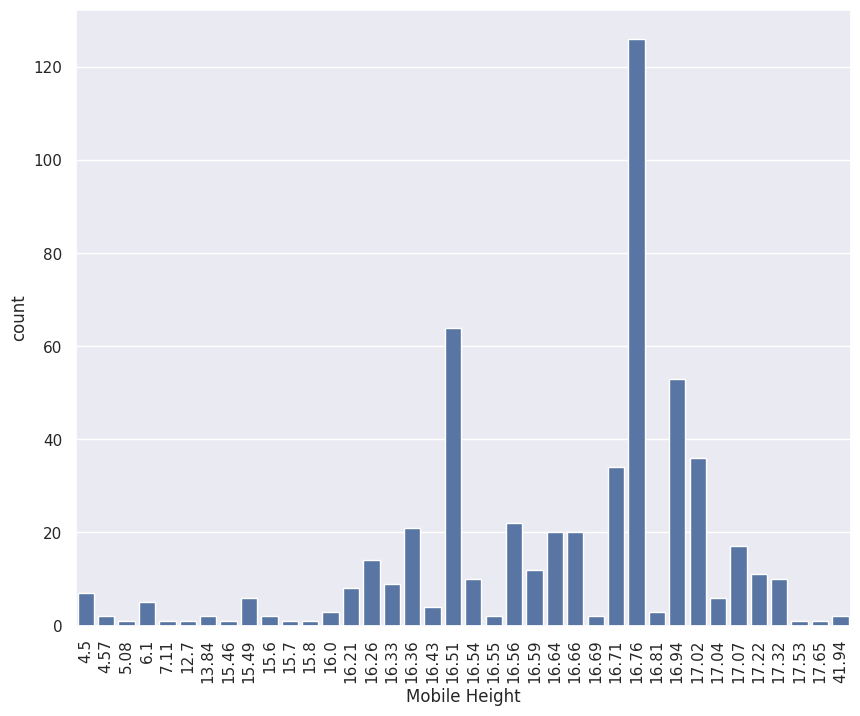

In [31]:
# Mobile Height

sns.set()
plt.figure(figsize=(10,8))
sns.countplot(x='Mobile Height',data=df)
plt.xticks(rotation=90)
plt.show()

It indicates that most phones fall within a standard height range.

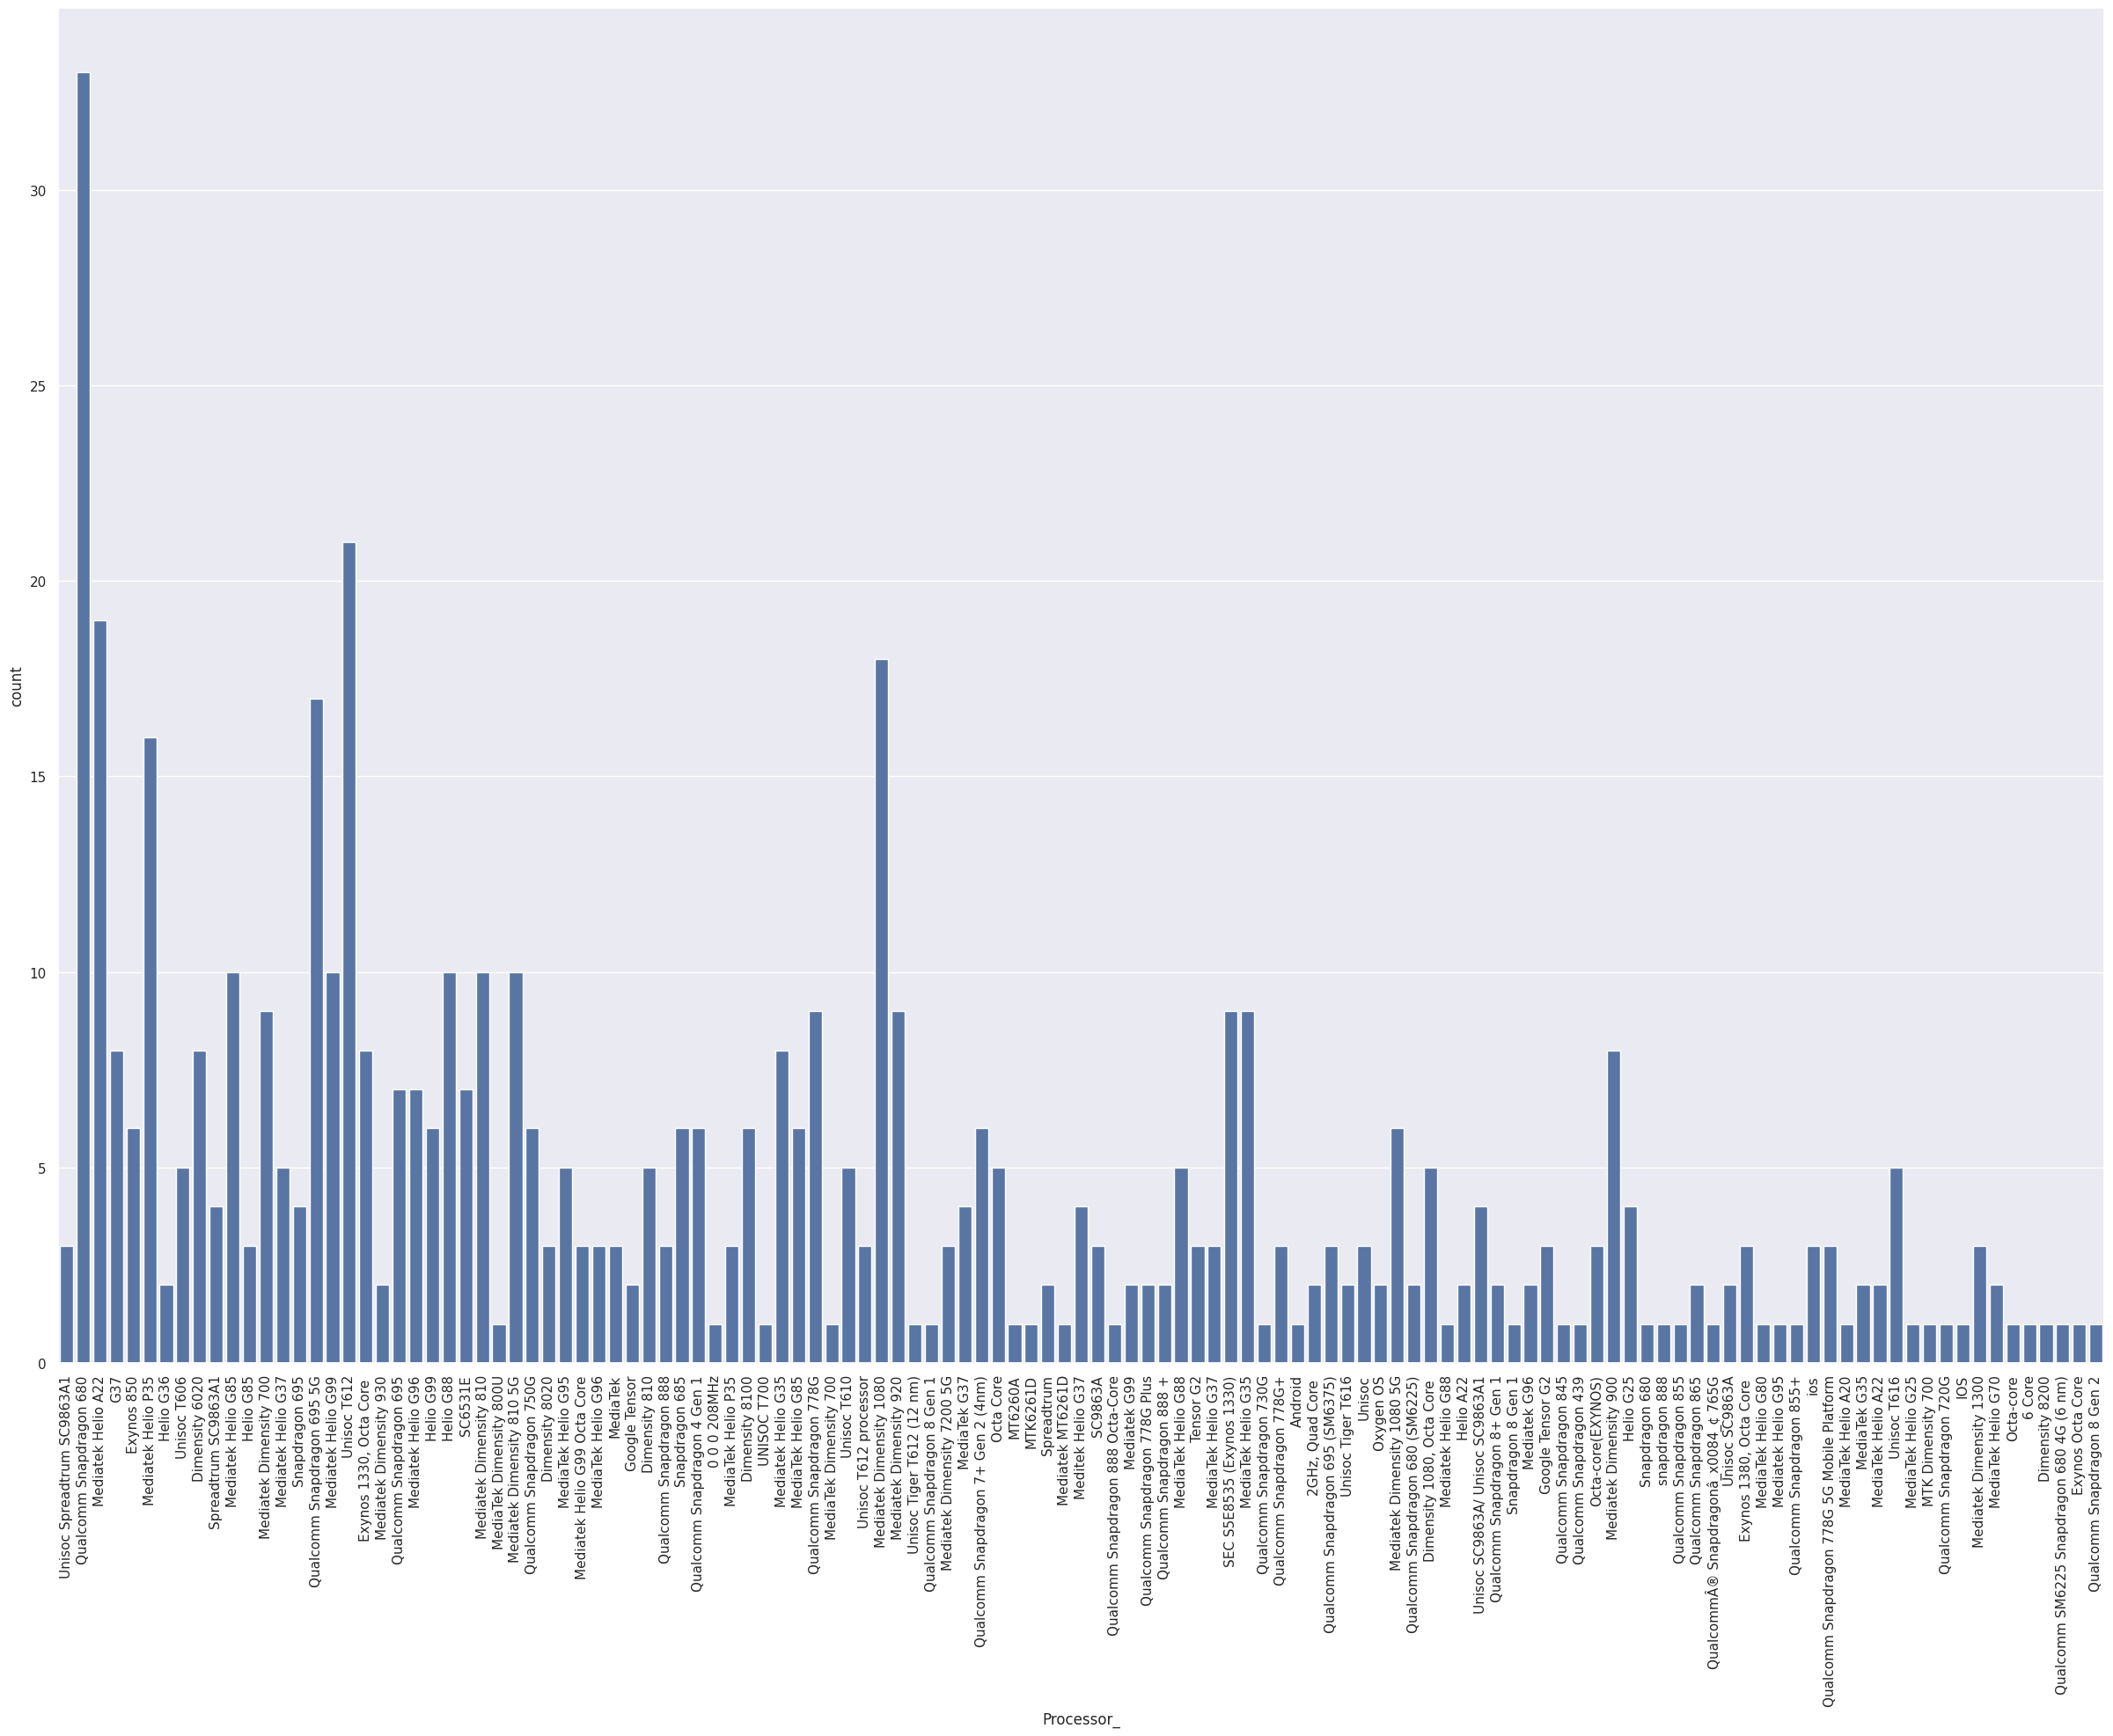

In [32]:
# Processor_

sns.set()
plt.figure(figsize=(30,20))
sns.countplot(x='Processor_',data=df)
plt.xticks(rotation=90)
plt.show()


Qualcomm Snapdragon 680, MediateK Helio A22 or Unisoc T612 Processor is used by many phones.

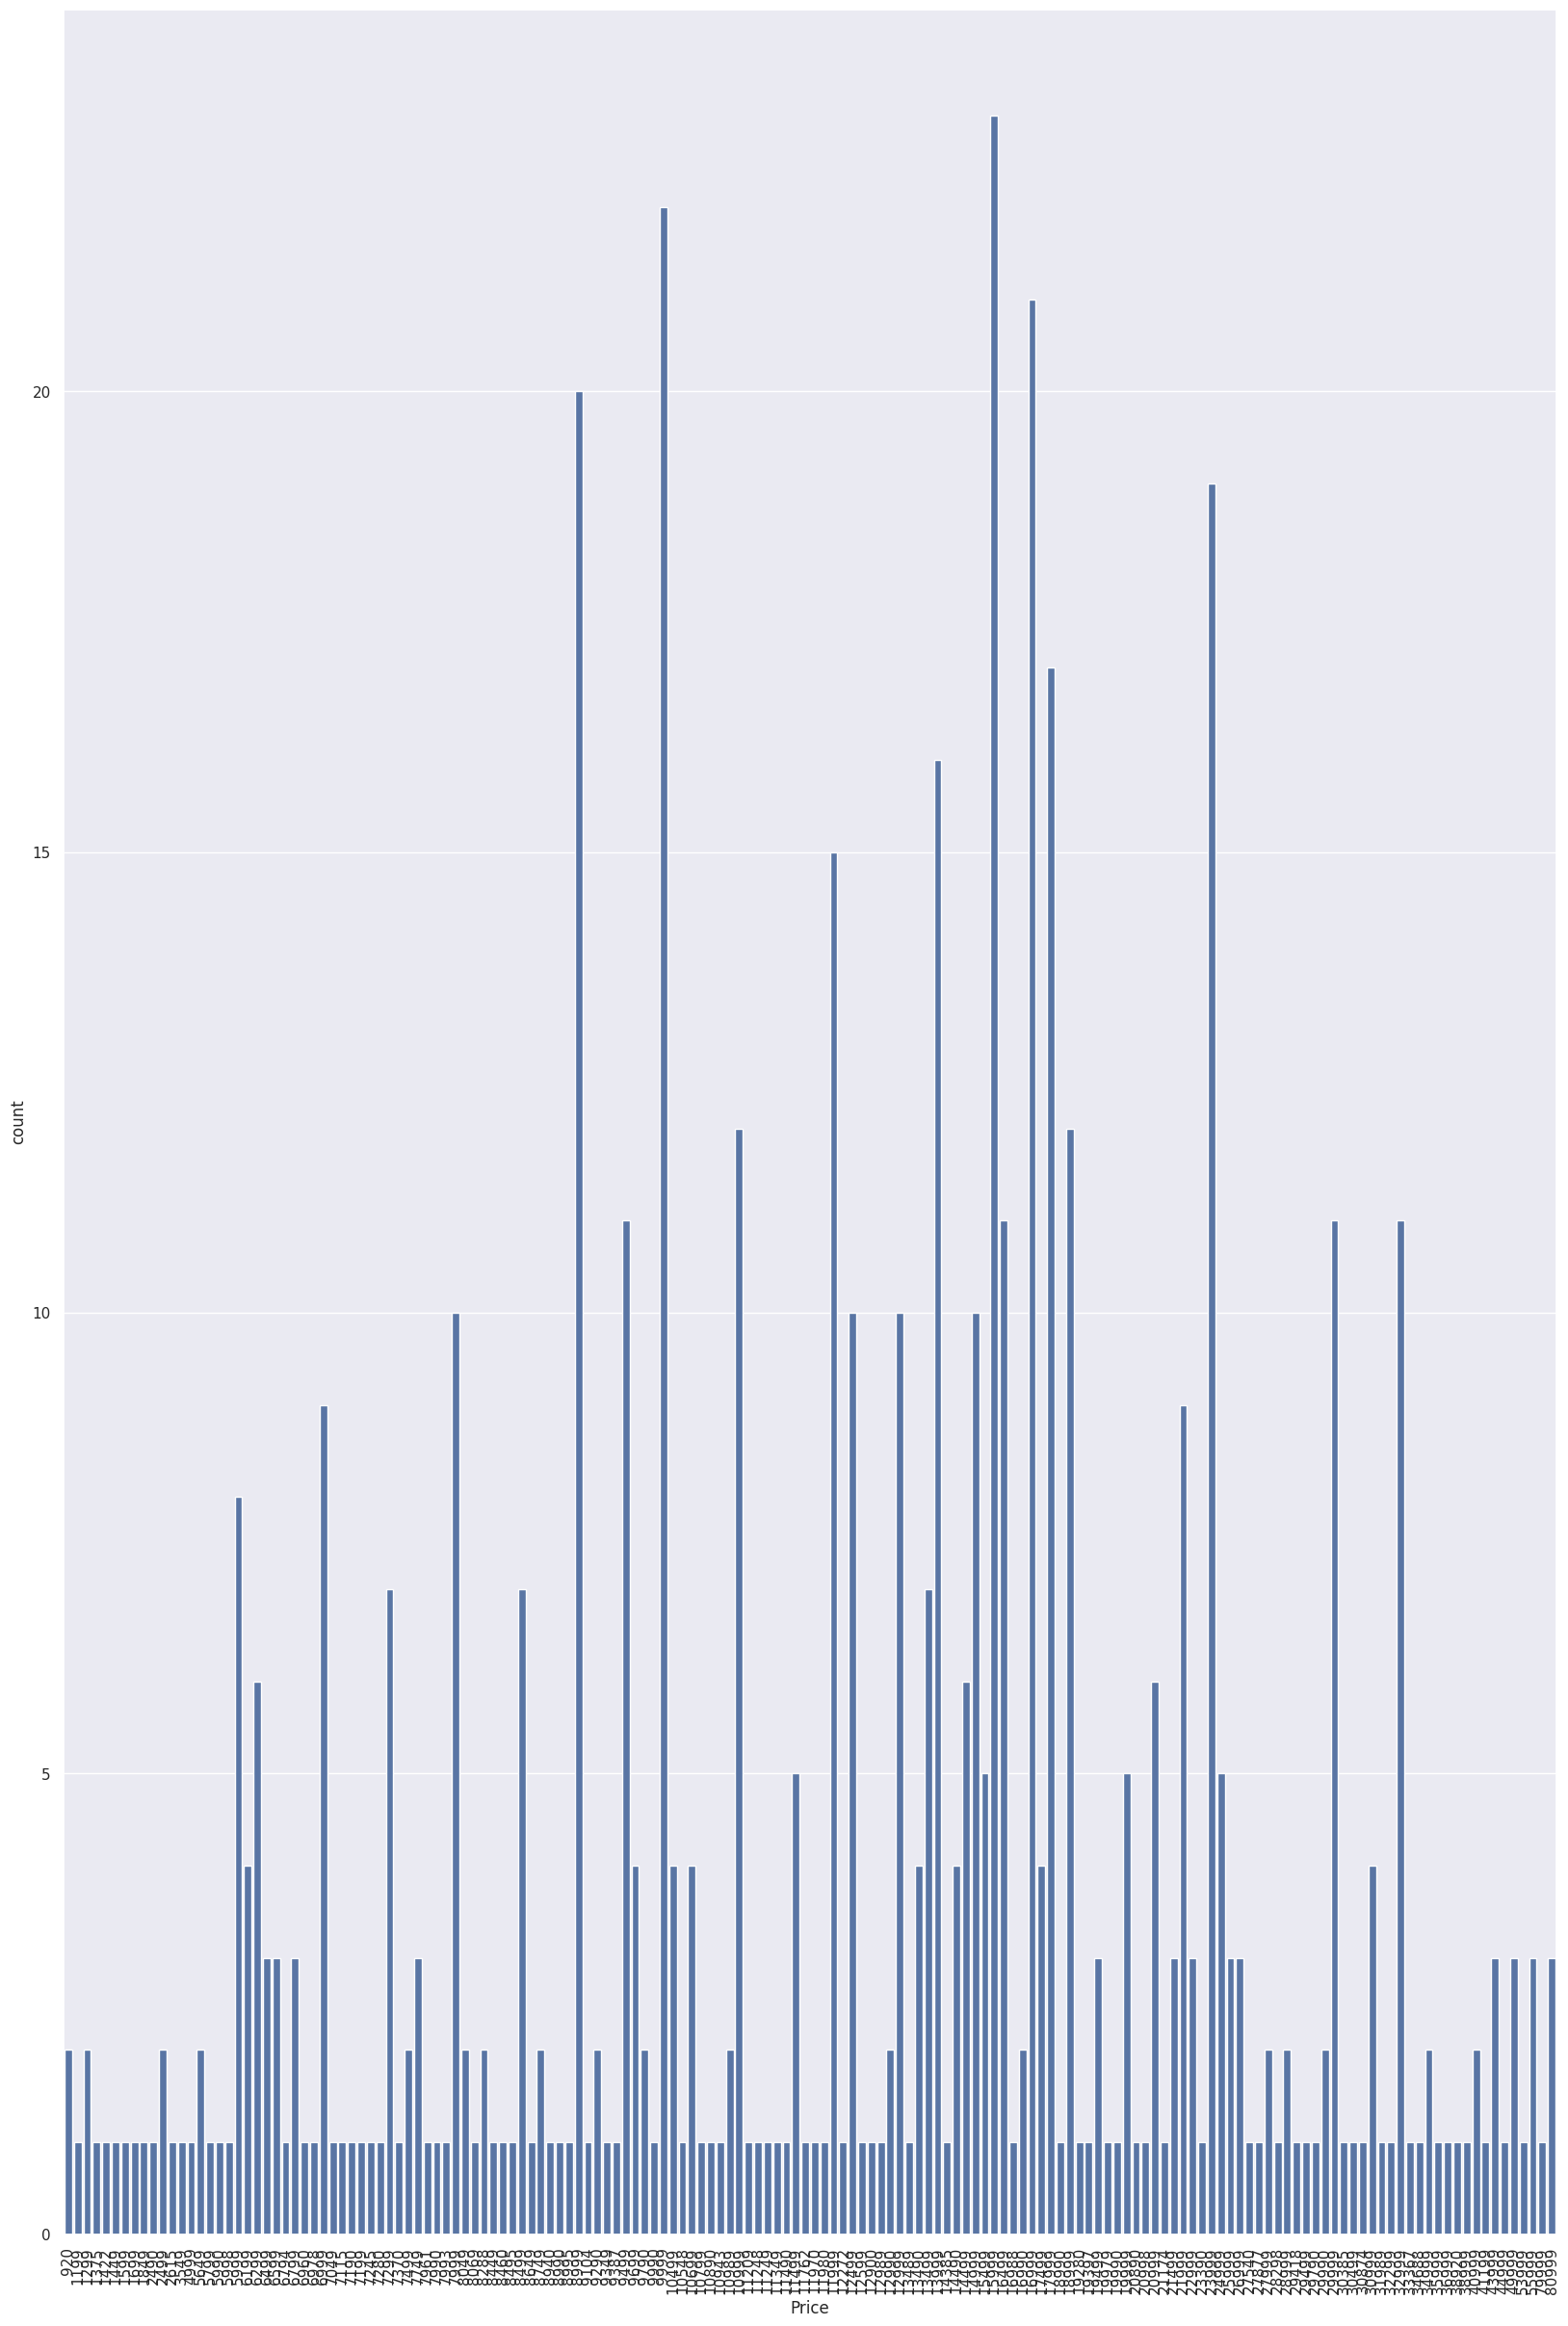

In [33]:
# Price

sns.set()
plt.figure(figsize=(30,40))
sns.countplot(x='Price',data=df)
plt.xticks(rotation=90)
plt.show()


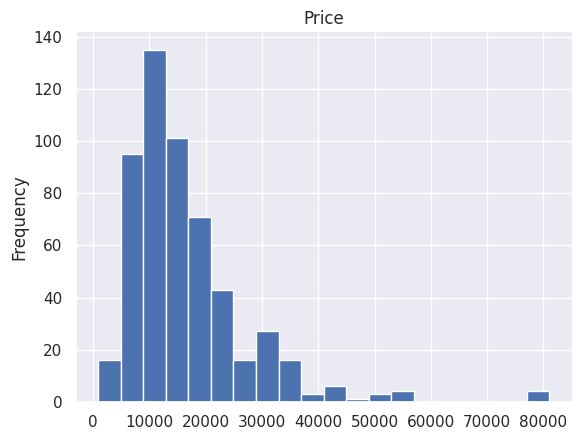

In [34]:
df['Price'].plot(kind='hist',bins=20,title='Price')
plt.gca().spines[['top','right',]].set_visible(False)

 Most of the phones are affordable and within a specific price range, but few are very expensive.



Bivariate Analysis

Bivariate Analysis between numerical variables and the target (Price)

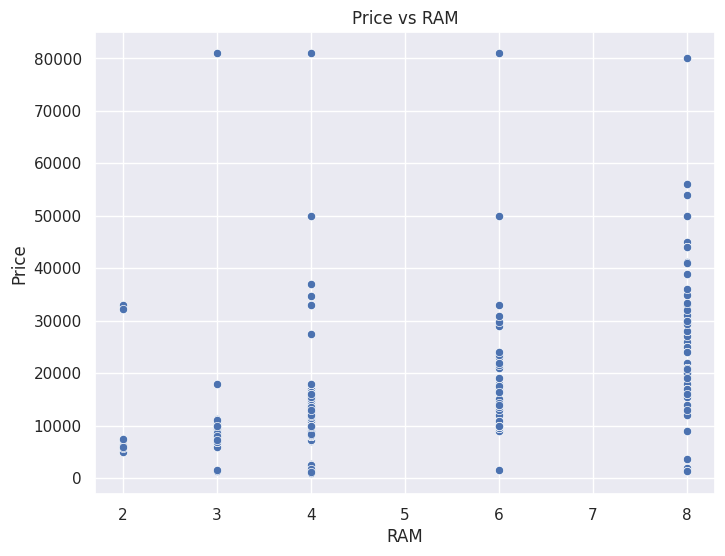

In [35]:
# Price vs RAM
plt.figure(figsize=(8,6))
sns.scatterplot(x='RAM',y='Price',data=df)
plt.title('Price vs RAM')
plt.show()

It observes an upward trend,which indicates that as RAM increases, the Price tends to increase.

*It might expect that higher RAM leads to higher prices.




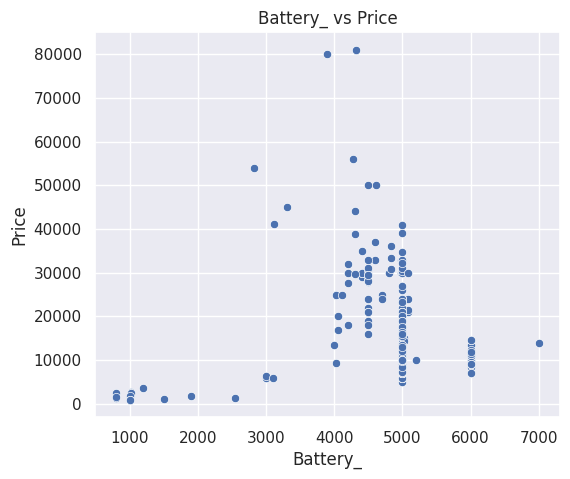

In [36]:
#Price vs Battery_
plt.figure(figsize=(6,5))
sns.scatterplot(x='Battery_',y='Price',data=df)
plt.title('Battery_ vs Price')
plt.show()

It shows that phones with a battery size of around 5000mAh dominate the mid-price range.

Bivariate Analysis for Categorical variables vs the target (Price)

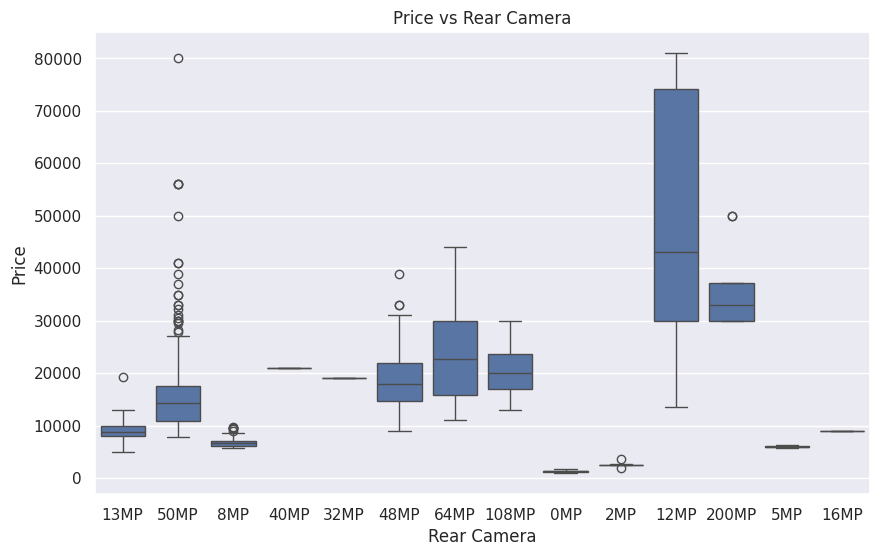

In [37]:
#Price vs Rear camera

plt.figure(figsize=(10,6))
sns.boxplot(x='Rear Camera',y='Price',data=df)
plt.title('Price vs Rear Camera')
plt.show()

Phones with more advanced camera setups may show higher median price.

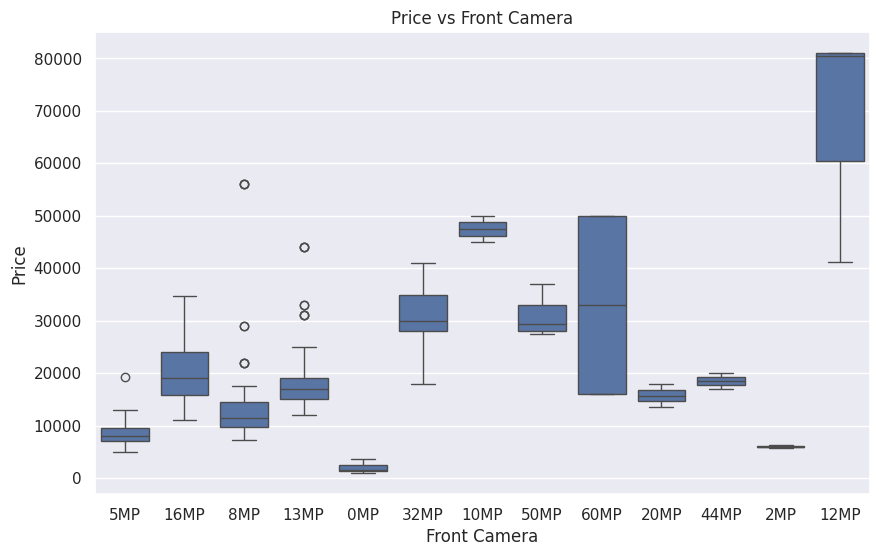

In [38]:
#Price vs Front Camera

plt.figure(figsize=(10,6))
sns.boxplot(x='Front Camera',y='Price',data=df)
plt.title('Price vs Front Camera')
plt.show()

Like the rear cameras, advanced front cameras could push phones into the higher price range.

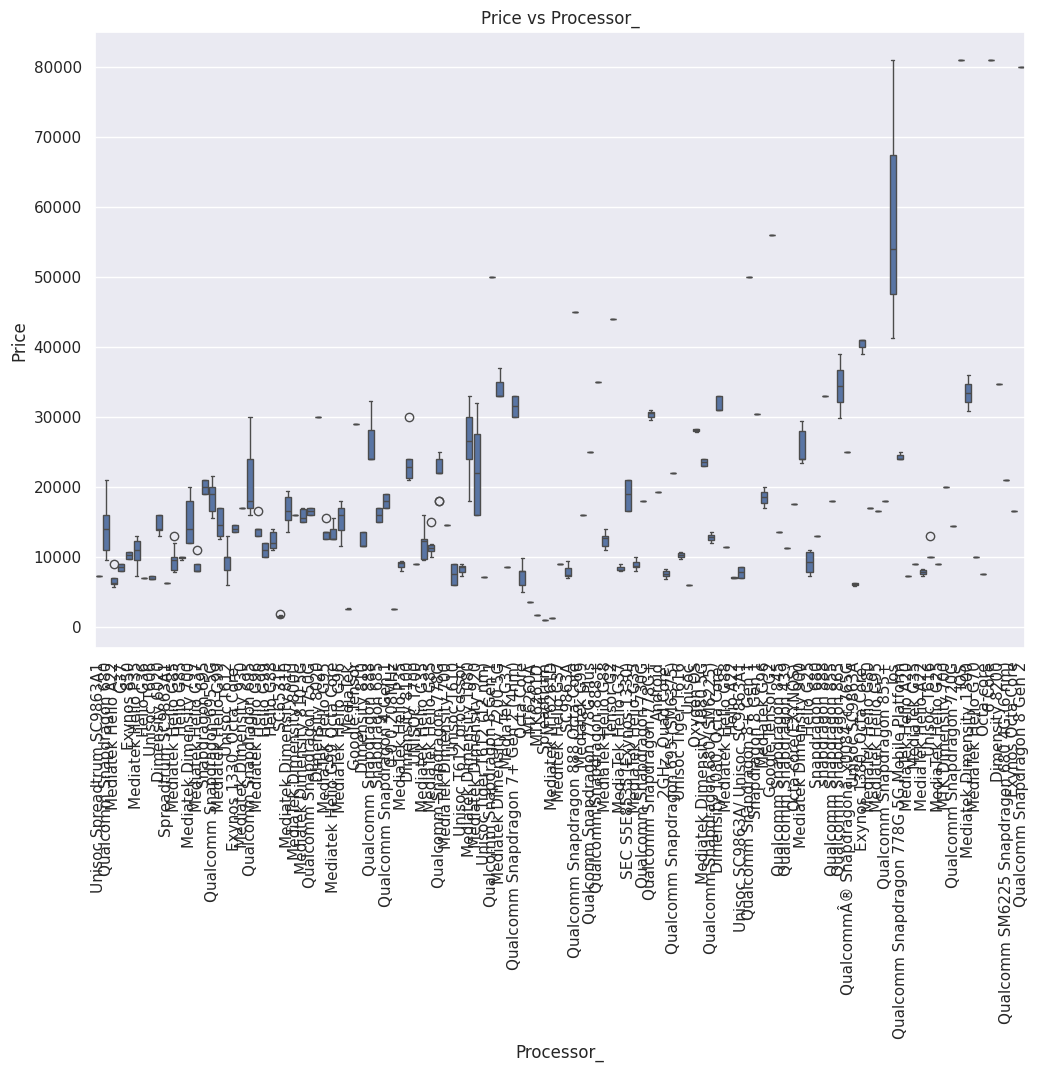

In [39]:
#Price vs Processor_

plt.figure(figsize=(12,8))
sns.boxplot(x='Processor_',y='Price',data=df)
plt.title('Price vs Processor_')
plt.xticks(rotation=90)
plt.show()



The Processor is a key component that affects price, and more powerful, efficient processors often drive up costs significantly.

Multivariate Analysis

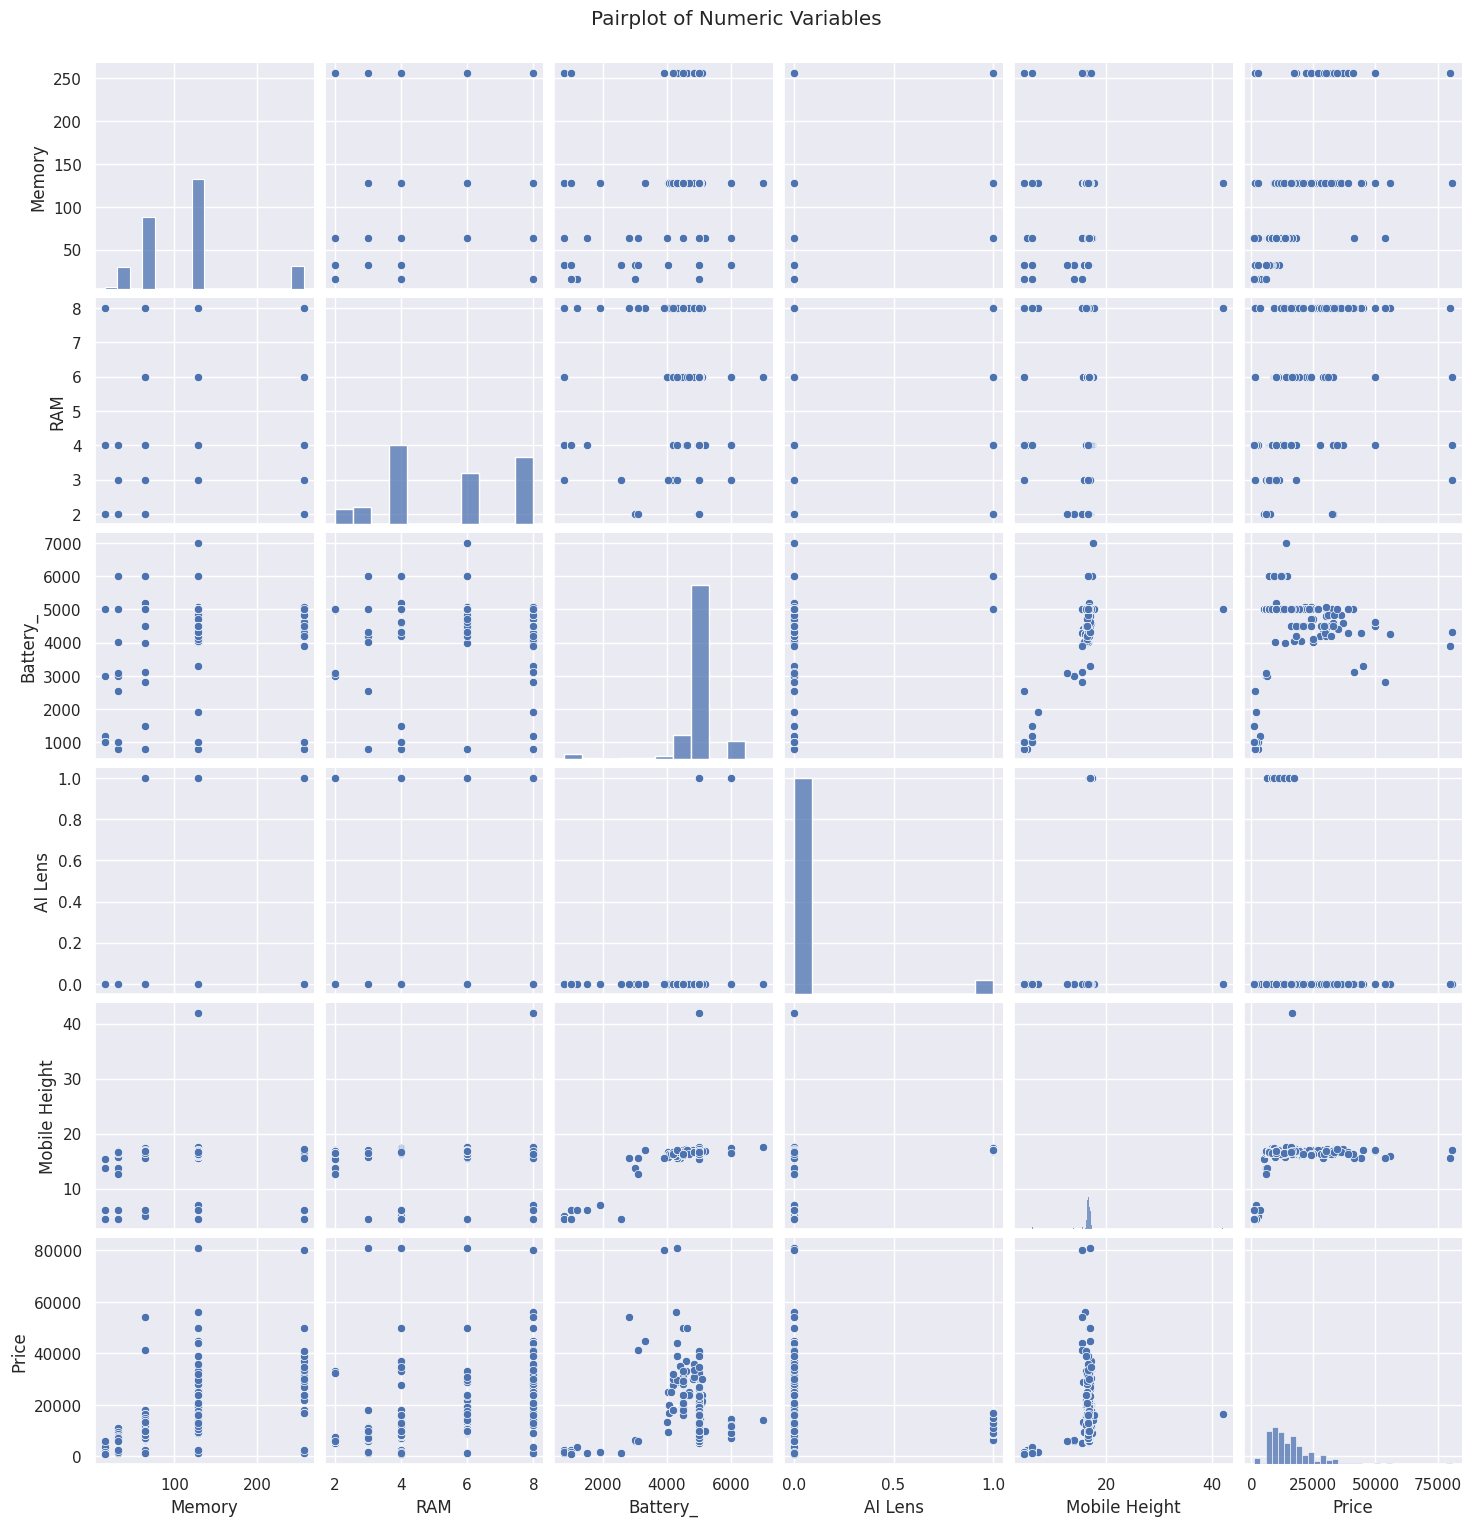

In [40]:
# Pairplot for multivariate analysis of numeric variables

# Identify numeric columns in the dataframe
numeric_col = df.select_dtypes(include=['number']).columns.tolist()
numeric_col.remove('Price') # Remove 'Price' if already present

sns.pairplot(df[numeric_col+['Price']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

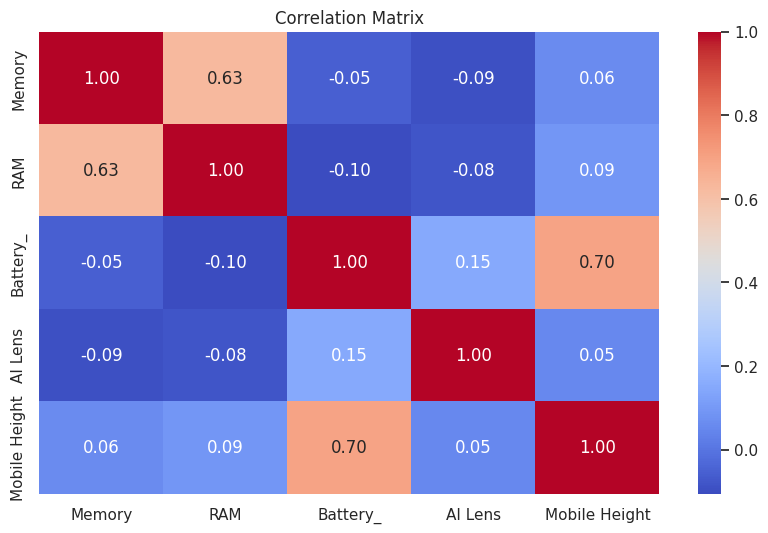

In [41]:
# Heatmap to show correlations between numeric variables

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_col].corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* Strong Correlation- Price have a strong positive correlation with RAM and Memory, means these factors likely drive phone pricing.

* Weak or No Correlation- Battery_ might not correlate strongly with Mobile Height, indicates that these two characteristics are independet to each other.

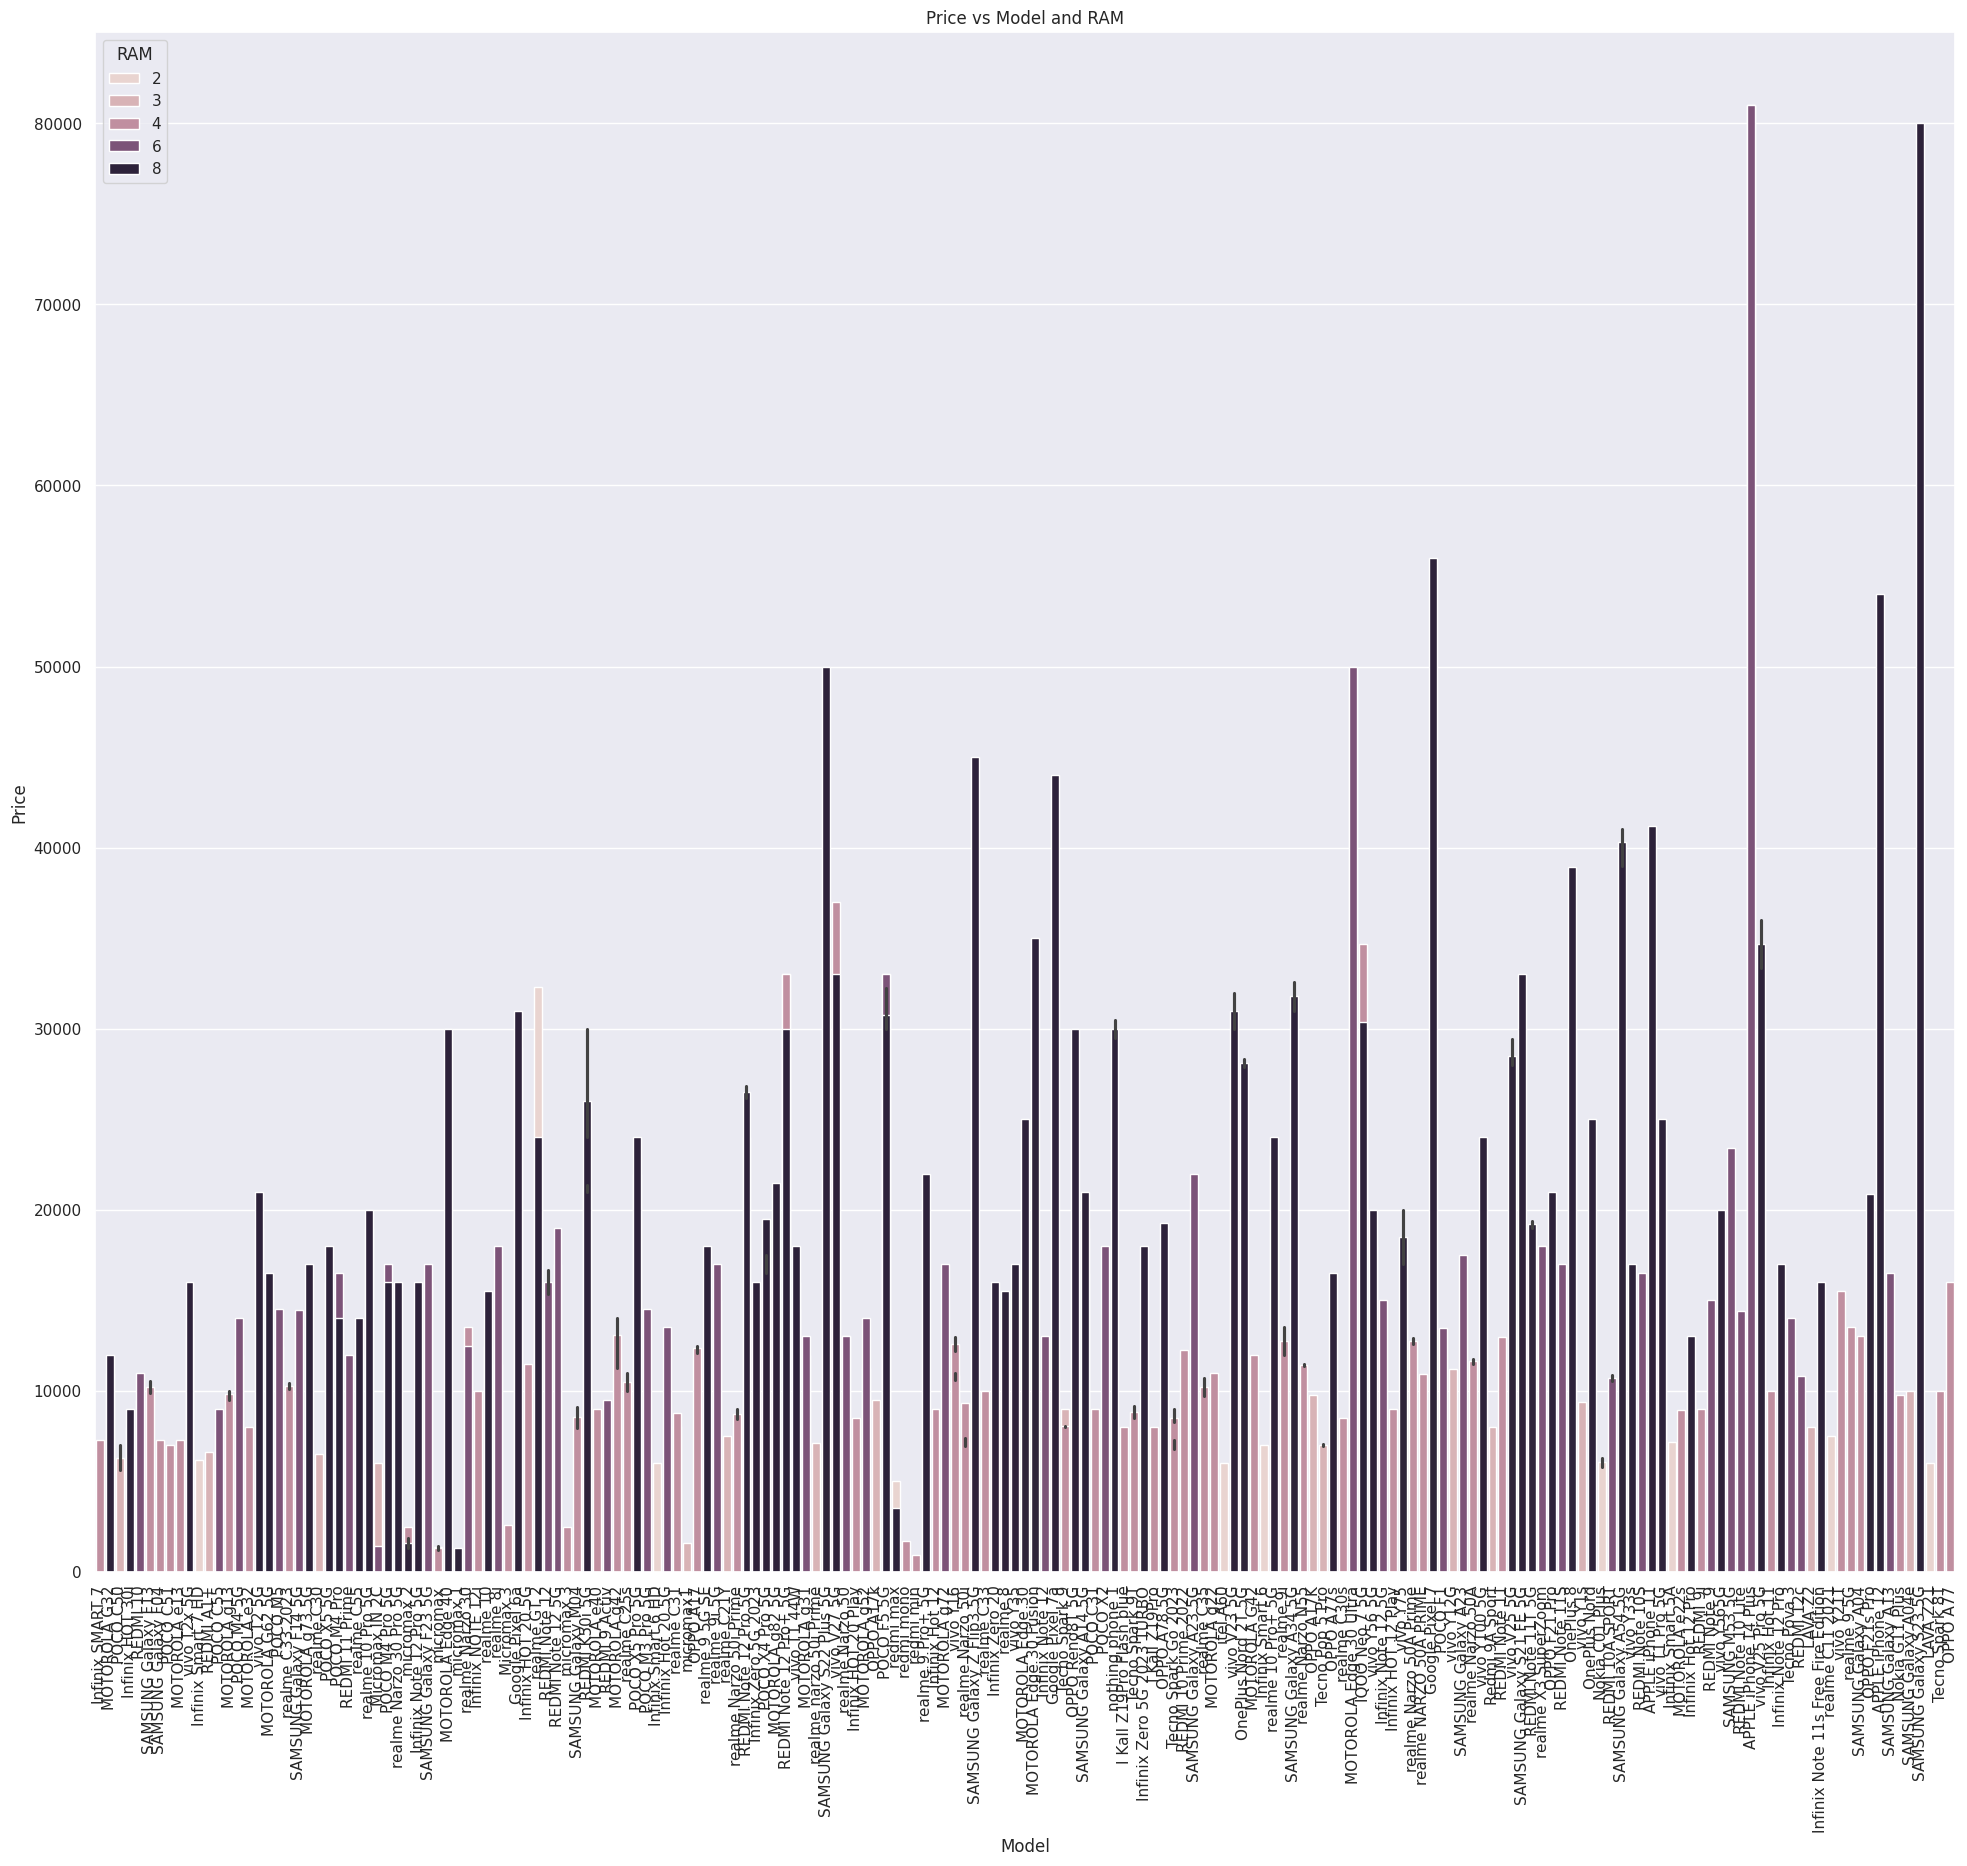

In [42]:
# Multivariate Analysis comparing Model,RAM, and Price

plt.figure(figsize=(24,20))
sns.barplot(x='Model', y='Price', hue='RAM', data=df, dodge=False)
plt.title('Price vs Model and RAM')
plt.xticks(rotation=90)
plt.show()

Outlier Detection and Viaualization

In [43]:
# Function to detect outliers using IQR

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [44]:
# List of numeric columns for outlier detection

numeric_col=df[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]


In [45]:
# Detect and print outliers for each numeric column

for col in numeric_col:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers in {col}:")
        print(outliers)
        print()

Outliers in Memory:
                          Model              Colour  Memory  RAM  Battery_  \
117            MOTOROLA Edge 40       Eclipse Black     256    8      4400   
118                  micromax 1       Eclipse Black     256    8       800   
127                  POCO X5 5G        Jaguar Black     256    8      5000   
154            MOTOROLA Edge 40        Nebula Green     256    8      4400   
155                  micromax 2        Nebula Green     256    8       800   
156                  micromax 3        Nebula Green     256    4      1020   
159               REDMI K50i 5G       Stealth Black     256    8      5080   
166              POCO X5 Pro 5G        Horizon Blue     256    8      5000   
175              POCO X5 Pro 5G        Astral Black     256    8      5000   
200                  POCO X5 5G        Wildcat Blue     256    8      5000   
201        REDMI Note 12 Pro 5G     Stardust Purple     256    8      5000   
209       REDMI Note 12 Pro+ 5G        Icebe

In [46]:
# Show outliers summary

outliers_summary = {col: len(outliers[outliers.columns.intersection([col])].dropna(how='all')) for col in numeric_col.columns}
print(outliers_summary)

{'Memory': 25, 'RAM': 25, 'Battery_': 25, 'AI Lens': 25, 'Mobile Height': 25, 'Price': 25}


In [47]:
# Function to remove_outliers_iqr(df,column):
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [48]:
# Remove outliers for each numeric column
df_cleaned = df.copy()
for col in numeric_col.columns:
    df_cleaned = remove_outliers(df_cleaned, col)

In [49]:
# Display the number of rows before and after outlier removal

print(f"Number of rows before outlier removal: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

Number of rows before outlier removal: 541
Number of rows after outlier removal: 330


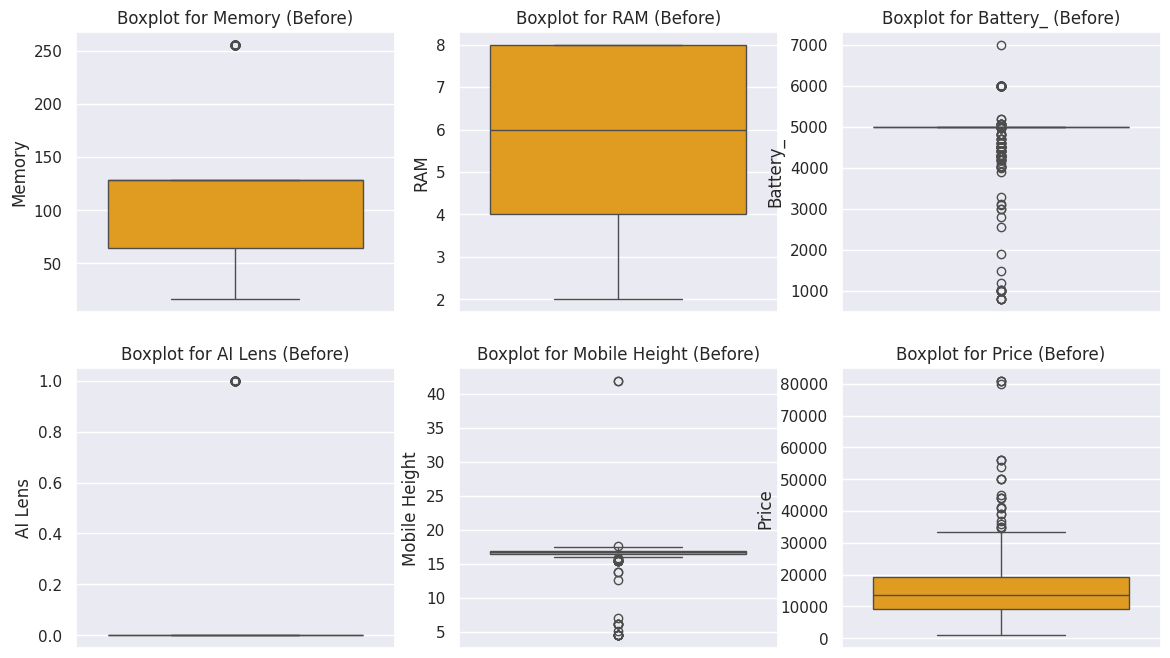

In [50]:
# Visualisation of outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

#Before removing outliers
for i,col in enumerate(numeric_col.columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col],color='orange')
    plt.title(f'Boxplot for {col} (Before)')

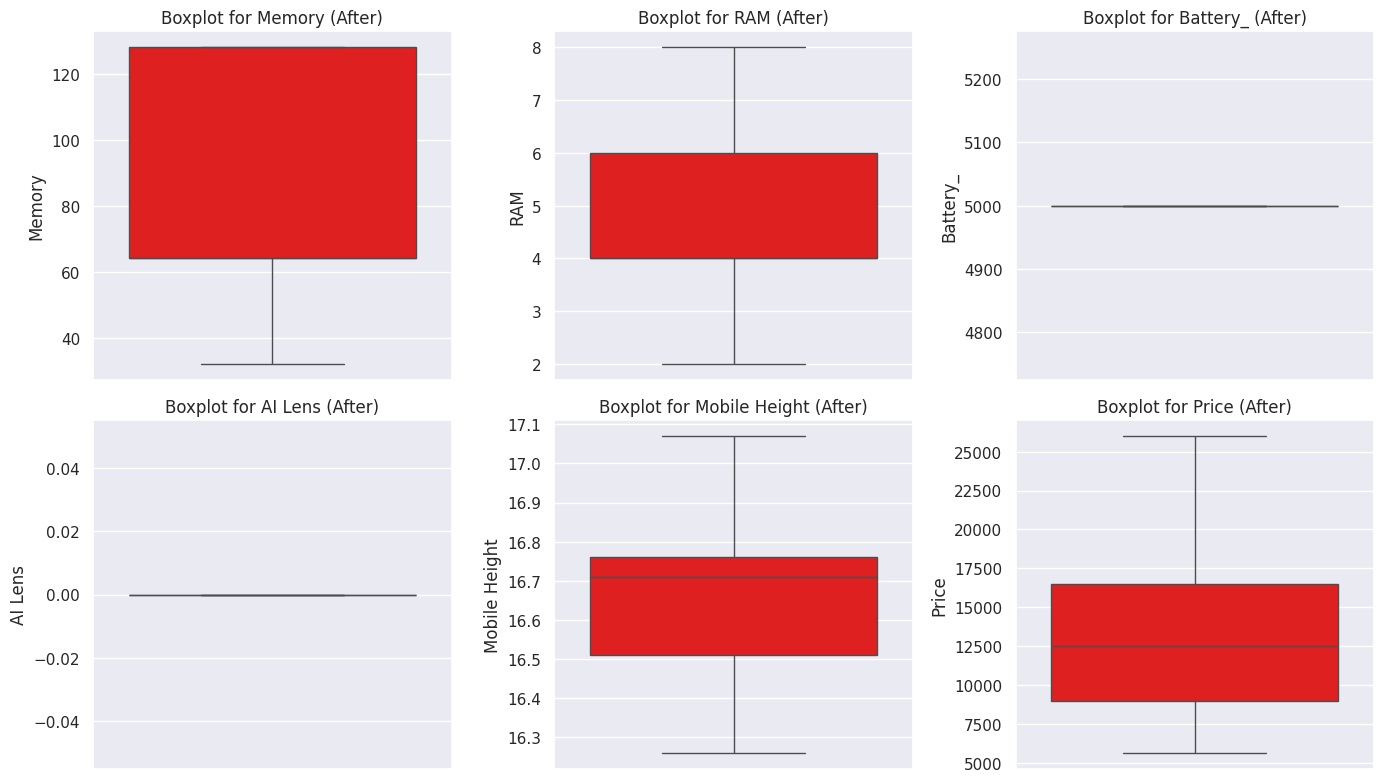

In [51]:
# After removing outliers

plt.figure(figsize=(14,8))
for i,col in enumerate(numeric_col.columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(df_cleaned[col],color='red')
    plt.title(f'Boxplot for {col} (After)')

plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [52]:
# IMPORT LIBRARIES

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer


In [53]:
# list of categorical columns

categorical_col=['Model','Colour','Rear Camera','Front Camera','Processor_']

Label Encoding

In [54]:
# LABEL ENCODING the CATEGORICAL FEATURES

le=LabelEncoder()

for column in categorical_col:
  df[column]=le.fit_transform(df[column])



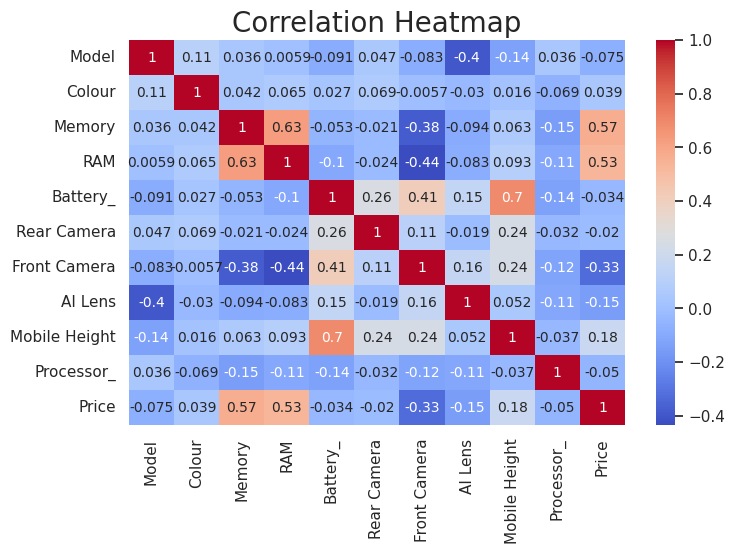

In [55]:
# Correlation Heatmap Visualization
# Checking for multi-collinearity
# Calculating the correlation matrix
correlation = df.corr()

#Creating Heatmap of the correlation matrix

plt.figure(figsize=[8,5])
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={'fontsize':10})
plt.title('Correlation Heatmap',fontsize=20)
plt.show()

In [56]:
df.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
Model,1.000000,0.106594,0.036055,0.005924,-0.090875,0.046810,-0.082802,-0.396336,-0.135728,0.036362,-0.075163
Colour,0.106594,1.000000,0.042121,0.064503,0.027350,0.068766,-0.005653,-0.030308,0.016014,-0.068677,0.038895
Memory,0.036055,0.042121,1.000000,0.625284,-0.053210,-0.021172,-0.380910,-0.094442,0.063163,-0.149665,0.566660
RAM,0.005924,0.064503,0.625284,1.000000,-0.104923,-0.024422,-0.435425,-0.082622,0.092951,-0.108733,0.532024
Battery_,-0.090875,0.027350,-0.053210,-0.104923,1.000000,0.255043,0.405750,0.150156,0.695641,-0.136305,-0.034297
Rear Camera,0.046810,0.068766,-0.021172,-0.024422,0.255043,1.000000,0.111926,-0.019088,0.242702,-0.032366,-0.019597
Front Camera,-0.082802,-0.005653,-0.380910,-0.435425,0.405750,0.111926,1.000000,0.156066,0.237706,-0.124950,-0.333833
AI Lens,-0.396336,-0.030308,-0.094442,-0.082622,0.150156,-0.019088,0.156066,1.000000,0.052018,-0.112740,-0.153691
Mobile Height,-0.135728,0.016014,0.063163,0.092951,0.695641,0.242702,0.237706,0.052018,1.000000,-0.036817,0.176009
Processor_,0.036362,-0.068677,-0.149665,-0.108733,-0.136305,-0.032366,-0.124950,-0.112740,-0.036817,1.000000,-0.050244


Features like RAM, Memory, Mobile Height are Positively corelated with the targeted variable Price.

Features like Battery_, Camera, Processor_ are Negatively co-related with the targeted variable Price.

Memory and RAM are Highly Correlated Variables.

In [57]:
#Select the Features (X) and target(y)

X=df_cleaned[['Memory','RAM','Battery_','AI Lens','Mobile Height']]  # Features
y=df_cleaned['Price']    # Target variable

Split the Dataset into Training and testing sets

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model Training


LINEAR REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Import necessary metrics


lr = LinearRegression()

In [60]:
# Fitting the Model

lr.fit(X_train,y_train)

LinearRegression()

In [61]:
#Calculate Predictions

y_predict=lr.predict(X_test)

In [62]:
#Calculate the evaluation metrics

r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict) # Assign the result to mse
mae = mean_absolute_error(y_test,y_predict) # Assign the result to mae

print(r2)
print(mse)
print(mae)

0.7566633483712907
6413427.859153767
1988.2038930404754


In [63]:
# Training Score

print("Training Accuracy",lr.score(X_train,y_train))

Training Accuracy 0.667843102364854


In [64]:
# Testing Score

print("Testing Accuracy",lr.score(X_test,y_test))

Testing Accuracy 0.7566633483712907


XGB Reggressor

In [65]:
from xgboost import XGBRegressor

In [66]:
xgb=XGBRegressor(gamma=0.1)

In [67]:
# Fitting the Model

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
# Calculate Predictions

y_predict=xgb.predict(X_test)

In [69]:
#Calculate the evaluation metrics

r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict) # Assign the result to mse
mae = mean_absolute_error(y_test,y_predict) # Assign the result to mae

print(r2)
print(mse)
print(mae)

0.8583564758300781
3733184.8469145875
1327.2409002130682


In [70]:
# Training Score

print("Training Accuracy",xgb.score(X_train,y_train))

Training Accuracy 0.8683515191078186


In [71]:
# Testing Score

print("Testing Accuracy",xgb.score(X_train,y_train))

Testing Accuracy 0.8683515191078186


LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression()

In [73]:
# Fitting the Model

lor.fit(X_train,y_train)

LogisticRegression()

In [74]:
# Calculate Predictions

y_predict=lor.predict(X_test)

In [75]:
#Calculate the evaluation metrics

r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict) # Assign the result to mse
mae = mean_absolute_error(y_test,y_predict) # Assign the result to mae

print(r2)
print(mse)
print(mae)

0.668390816919693
8739955.772727273
2105.712121212121


In [76]:
# Training Score

print("Training Accuracy",lor.score(X_train,y_train))

Training Accuracy 0.125


In [77]:
# Testing Score

print("Testing Accuracy",lor.score(X_test,y_test))

Testing Accuracy 0.16666666666666666


RANDOM FOREST REGRESSOR

In [78]:
from sklearn.ensemble import RandomForestRegressor

Rfr = RandomForestRegressor()

In [79]:
# Fitting the model

Rfr.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
# Calculate Predictions

y_predict=Rfr.predict(X_test)

In [81]:
# Calculate the evaluation metrics

r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict) # Assign the result to mse
mae = mean_absolute_error(y_test,y_predict) # Assign the result to mae

print(r2)
print(mse)
print(mae)

0.8539268205085224
3849932.973743946
1451.9584836662298


In [82]:
# Training Score

print("Training Accuracy",Rfr.score(X_train,y_train))

Training Accuracy 0.8652275011539649


In [83]:
# Testing Score

print("Testing Accuracy", Rfr.score(X_test,y_test))

Testing Accuracy 0.8539268205085224


MODEL EVALUATION

In [84]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the calculate_metrics function
def calculate_metrics(y_true, y_pred):
    """
    Calculates R-squared, MSE, and MAE for the given predictions.

    Args:
    y_true: The actual target values.
    y_pred: The predicted target values.

    Returns:
    A dictionary containing R-squared, MSE, and MAE.
    """
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'r2': r2, 'mse': mse, 'mae': mae}

# Initialize models
lr = LinearRegression()
xgb = XGBRegressor(gamma=0.1)
Rfr = RandomForestRegressor()
lor = LogisticRegression()

# Assuming X_test, y_test are defined somewhere in your code
# Assuming you have trained the models using X_train and y_train

# # Fit the models before predicting
lr.fit(X_train, y_train)  # Train Linear Regression
Rfr.fit(X_train, y_train)  # Train Random Forest
xgb.fit(X_train, y_train)  # Train XGBoost
lor.fit(X_train, y_train)  # Train Logistic Regression

# Generate predictions for each model
y_pred_lr = lr.predict(X_test)  # Predict using Linear Regression
y_pred_rf = Rfr.predict(X_test)  # Predict using Random Forest
y_pred_xgb = xgb.predict(X_test)  # Predict using XGBoost
y_pred_lor = lor.predict(X_test)  # Predict using Logistic Regression


# Collect metrics for each column
lr_metrics = calculate_metrics(y_test, y_pred_lr)
rf_metrics = calculate_metrics(y_test, y_pred_rf)
xgb_metrics = calculate_metrics(y_test, y_pred_xgb)
lor_metrics = calculate_metrics(y_test, y_pred_lor)

# Create a Dataframe to summerize results
# Use the correct keys 'r2', 'mse', and 'mae' to access the metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Logistic Regression'],
    'R^2 Score': [lr_metrics['r2'], rf_metrics['r2'], xgb_metrics['r2'], lor_metrics['r2']],
    'MSE': [lr_metrics['mse'], rf_metrics['mse'], xgb_metrics['mse'], lor_metrics['mse']],
    'MAE': [lr_metrics['mae'], rf_metrics['mae'], xgb_metrics['mae'], lor_metrics['mae']]
})

# Display the results
print(results)

                 Model  R^2 Score           MSE          MAE
0    Linear Regression   0.756663  6.413428e+06  1988.203893
1        Random Forest   0.848787  3.985399e+06  1476.652618
2              XGBoost   0.858356  3.733185e+06  1327.240900
3  Logistic Regression   0.668391  8.739956e+06  2105.712121


In [89]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np  # Import numpy


#Initialize train_accuracy and test_accuracy as dictionaries before using them
train_accuracy = {}
test_accuracy = {}

# Calculate MSE and then convert to accuracy
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    accuracy = 1 - (mse / np.var(y_true))  # Normalized accuracy
    return accuracy

# Loop through your models and calculate accuracies
for model_name, model in models.items(): # Assuming 'models' is a dictionary containing your models
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store accuracies
    train_accuracy[model_name] = calculate_accuracy(y_train, y_train_pred)
    test_accuracy[model_name] = calculate_accuracy(y_test, y_test_pred)

# Create a DataFrame to hold the accuracy results
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': [train_accuracy[model] for model in models.keys()],
    'Testing Accuracy': [test_accuracy[model] for model in models.keys()]
})

# Display the DataFrame
print(accuracy_df)

                 Model  Training Accuracy  Testing Accuracy
0    Linear Regression           0.667843          0.756663
1        Random Forest           0.865197          0.847605
2              XGBoost           0.868352          0.858354
3  Logistic Regression           0.553950          0.668391


Comparing models and visualising for MSE comparision and R^2 score

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training Scores:
                              MSE        R²
Linear Regression    7.589966e+06  0.667843
Random Forest        3.080333e+06  0.865197
XGBoost              3.031372e+06  0.867339
Logistic Regression  9.208488e+06  0.597012

Test Scores:
                              MSE        R²
Linear Regression    6.413428e+06  0.756663
Random Forest        4.016557e+06  0.847605
XGBoost              3.915133e+06  0.851453
Logistic Regression  1.050479e+07  0.601430


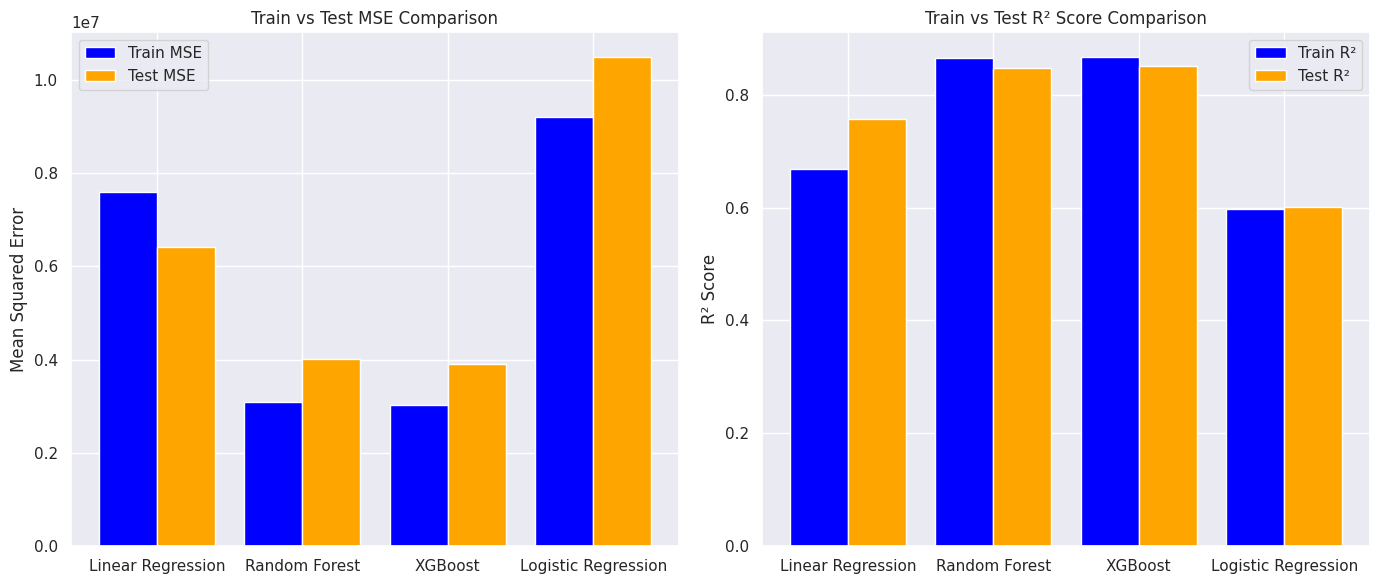

In [87]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)  # Used as classification model
}

# Tune XGBoost hyperparameters using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

xgb_random_search = RandomizedSearchCV(
    estimator=models['XGBoost'],
    param_distributions=param_grid,
    n_iter=50,  # number of iterations
    scoring='neg_mean_squared_error',  # scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=1,  # progress output
    random_state=42,
    n_jobs=-1  # use all available CPU cores
)

# Standardizing the features for Logistic Regression (since it is sensitive to scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and tune models
train_scores = {}
test_scores = {}

for model_name, model in models.items():
    if model_name == 'XGBoost':
        # Use RandomizedSearchCV for tuning XGBoost
        xgb_random_search.fit(X_train, y_train)
        model = xgb_random_search.best_estimator_
    elif model_name == 'Logistic Regression':
        # Use scaled data for Logistic Regression
        model.fit(X_train_scaled, y_train)
    else:
        # Train other models
        model.fit(X_train, y_train)

    # Make predictions
    if model_name == 'Logistic Regression':
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calculate MSE and R² for training and testing data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the results
    train_scores[model_name] = {'MSE': train_mse, 'R²': train_r2}
    test_scores[model_name] = {'MSE': test_mse, 'R²': test_r2}

# Create a DataFrame to hold the comparison results
train_scores_df = pd.DataFrame(train_scores).T
test_scores_df = pd.DataFrame(test_scores).T

print("Training Scores:")
print(train_scores_df)
print("\nTest Scores:")
print(test_scores_df)

# Visualize the comparison using bar plots
plt.figure(figsize=(14, 6))

# Plot MSE comparison
plt.subplot(1, 2, 1)
train_mse_vals = [score['MSE'] for score in train_scores.values()]
test_mse_vals = [score['MSE'] for score in test_scores.values()]
model_names = list(models.keys())
width = 0.4

# Train MSE
plt.bar(np.arange(len(models)) - width/2, train_mse_vals, width=width, label='Train MSE', color='blue')
# Test MSE
plt.bar(np.arange(len(models)) + width/2, test_mse_vals, width=width, label='Test MSE', color='orange')

plt.xticks(np.arange(len(models)), model_names)
plt.title('Train vs Test MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot R² score comparison
plt.subplot(1, 2, 2)
train_r2_vals = [score['R²'] for score in train_scores.values()]
test_r2_vals = [score['R²'] for score in test_scores.values()]

# Train R²
plt.bar(np.arange(len(models)) - width/2, train_r2_vals, width=width, label='Train R²', color='blue')
# Test R²
plt.bar(np.arange(len(models)) + width/2, test_r2_vals, width=width, label='Test R²', color='orange')

plt.xticks(np.arange(len(models)), model_names)
plt.title('Train vs Test R² Score Comparison')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()

Best Performing Model:
XGBoost has the lowest testing MSE (3.915133e+06).
The training MSE for XGBoost is also low (3.031372e+06), indicating it performs well on both training and test data.
Therefore, XGBoost is the best-performing model based on the provided MSE values.

*Potential Overfitting: None of the models show significant signs of overfitting, but Random Forest has a slight indication.


*Underfitting: Linear Regression and Logistic Regression both show underfitting tendencies, particularly Logistic Regression, which performs poorly on both training and testing datasets.

CROSS VALIDATION

   Linear Regression  Random Forest       XGBoost  Logistic Regression
0       7.539947e+06   5.354313e+06  5.122062e+06         1.416593e+07
1       6.282440e+06   3.500801e+06  3.453582e+06         8.370859e+06
2       8.899998e+06   6.145180e+06  6.017941e+06         8.893537e+06
3       7.186846e+06   5.447132e+06  5.026917e+06         9.126029e+06
4       9.833707e+06   6.156771e+06  5.132161e+06         9.036107e+06


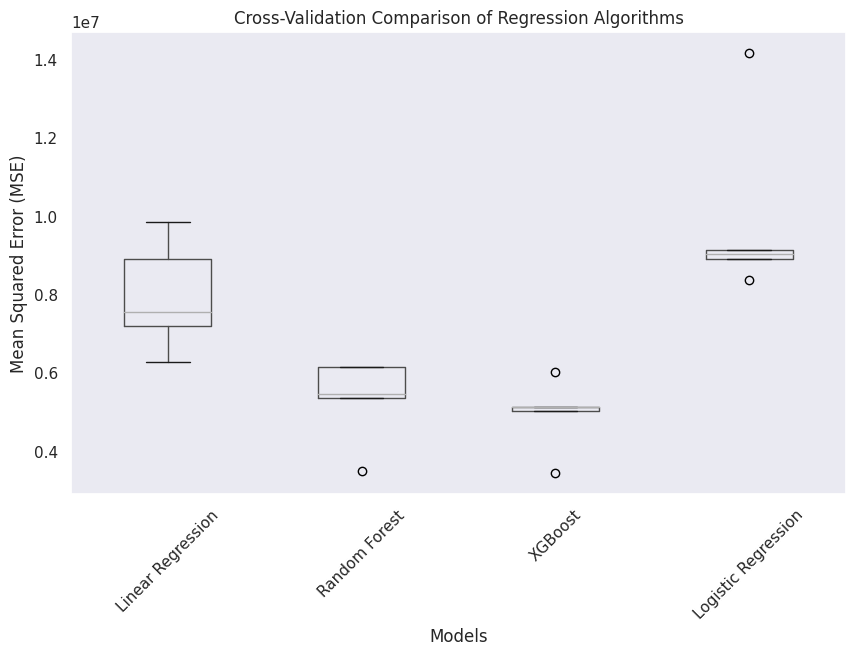

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize a dictionary to store cross-validation scores
cv_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        # For logistic regression, use scaled data
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    else:
        # For other models
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Store the negative scores (since cross_val_score returns negative MSE)
    cv_scores[model_name] = -scores  # convert to positive MSE

# Convert the cross-validation scores to a DataFrame for easy plotting
cv_scores_df = pd.DataFrame(cv_scores)

# Print the cross-validation results
print(cv_scores_df)

# Visualization using a box plot
plt.figure(figsize=(10, 6))
cv_scores_df.boxplot()
plt.title('Cross-Validation Comparison of Regression Algorithms')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()